# EDA - Comparativo de Desempenho de Alunos Matriculados nas Mesmas Disciplinas de Matemática e Português

# Importação de Bibliotecas e Configurações Iniciais

In [89]:
# Permite importar módulos .py que estão na raiz do repositório 

import sys, pathlib
ROOT = pathlib.Path().resolve().parents[1]  # sobe de EDA/ para a raiz
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))


In [90]:
#Importação dos Módulos e Funções Desenvolvidos


from documentar_resultados import  *
from pre_modelagem import *
from feature_selection import *
from eda_functions import *

# Importação de bibliotecas padrão
# Pandas para manipulação de dados, Seaborn e Matplotlib para visualização

import pandas as pd
import numpy as np
import seaborn as sns

# Configurações do Pandas para exibir todas as linhas e colunas no DataFrame 
# para inspeção detalhada dos dados no Jupyter Notebook

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Carregamento  e Integração das bases de português e matemática

In [91]:
df_p = importar_base('por')
df_m = importar_base('mat')


In [92]:
notas = ['nota1_por','nota1_mat','nota2_por','nota2_mat','nota_final_por','nota_final_mat']

In [93]:
#informação extraída da página UCI Machine Learning Repository - Student Performance Dataset 


identificadores_oficiais = [
    "escola",               # school
    "genero",               # sex
    "idade",                # age
    "endereco",             # address
    "tamanho_familia",      # famsize
    "status_parental",      # Pstatus
    "escolaridade_mae",     # Medu
    "escolaridade_pai",     # Fedu
    "profissao_mae",        # Mjob
    "profissao_pai",        # Fjob
    "motivo_escolha_escola",# reason
    "frequentou_creche",    # nursery
    "acesso_internet"       # internet
]


In [94]:
df_merge = pd.merge(df_m, df_p, on=identificadores_oficiais, suffixes=('_mat', '_por'))

# 1. Visão Geral dos Dados e Levantamento dos Requisitos de Análise

In [95]:
df_merge.head()

,escola,genero,idade,endereco,tamanho_familia,status_parental,escolaridade_mae,escolaridade_pai,profissao_mae,profissao_pai,motivo_escolha_escola,responsavel_legal_mat,tempo_transporte_mat,tempo_estudo_mat,reprovacoes_mat,apoio_escolar_mat,apoio_familiar_mat,aulas_particulares_mat,atividades_extracurriculares_mat,frequentou_creche,intencao_superior_mat,acesso_internet,relacionamento_romantico_mat,relacao_familiar_mat,tempo_livre_mat,frequencia_saidas_mat,alcool_dias_uteis_mat,alcool_fim_semana_mat,saude_mat,faltas_mat,nota1_mat,nota2_mat,nota_final_mat,aprovacao_mat,responsavel_legal_por,tempo_transporte_por,tempo_estudo_por,reprovacoes_por,apoio_escolar_por,apoio_familiar_por,aulas_particulares_por,atividades_extracurriculares_por,intencao_superior_por,relacionamento_romantico_por,relacao_familiar_por,tempo_livre_por,frequencia_saidas_por,alcool_dias_uteis_por,alcool_fim_semana_por,saude_por,faltas_por,nota1_por,nota2_por,nota_final_por,aprovacao_por
0,Gabriel Pereira,Mulher,18,Urbano,Mais de 3 membros,Separados,4,4,Dona de casa,Professor(a),Curso específico,Mãe,2,2,0,Sim,Não,Não,Não,Sim,Sim,Não,Não,4,3,4,1,1,3,6,5,6,6,Reprovado,Mãe,2,2,0,Sim,Não,Não,Não,Sim,Não,4,3,4,1,1,3,4,0,11,11,Aprovado
1,Gabriel Pereira,Mulher,17,Urbano,Mais de 3 membros,Juntos,1,1,Dona de casa,Outra profissão,Curso específico,Pai,1,2,0,Não,Sim,Não,Não,Não,Sim,Sim,Não,5,3,3,1,1,3,4,5,5,6,Reprovado,Pai,1,2,0,Não,Sim,Não,Não,Sim,Não,5,3,3,1,1,3,2,9,11,11,Aprovado
2,Gabriel Pereira,Mulher,15,Urbano,3 membros ou menos,Juntos,1,1,Dona de casa,Outra profissão,Outro motivo,Mãe,1,2,3,Sim,Não,Sim,Não,Sim,Sim,Sim,Não,4,3,2,2,3,3,10,7,8,10,Aprovado,Mãe,1,2,0,Sim,Não,Não,Não,Sim,Não,4,3,2,2,3,3,6,12,13,12,Aprovado
3,Gabriel Pereira,Mulher,15,Urbano,Mais de 3 membros,Juntos,4,2,Área da saúde,Serviços,Próximo de casa,Mãe,1,3,0,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim,3,2,2,1,1,5,2,15,14,15,Aprovado,Mãe,1,3,0,Não,Sim,Não,Sim,Sim,Sim,3,2,2,1,1,5,0,14,14,14,Aprovado
4,Gabriel Pereira,Mulher,16,Urbano,Mais de 3 membros,Juntos,3,3,Outra profissão,Outra profissão,Próximo de casa,Pai,1,2,0,Não,Sim,Sim,Não,Sim,Sim,Não,Não,4,3,2,1,2,5,4,6,10,10,Aprovado,Pai,1,2,0,Não,Sim,Não,Não,Sim,Não,4,3,2,1,2,5,0,11,13,13,Aprovado


In [96]:
df_merge.shape

(382, 55)

In [97]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 381
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   escola                            382 non-null    object
 1   genero                            382 non-null    object
 2   idade                             382 non-null    int64 
 3   endereco                          382 non-null    object
 4   tamanho_familia                   382 non-null    object
 5   status_parental                   382 non-null    object
 6   escolaridade_mae                  382 non-null    int64 
 7   escolaridade_pai                  382 non-null    int64 
 8   profissao_mae                     382 non-null    object
 9   profissao_pai                     382 non-null    object
 10  motivo_escolha_escola             382 non-null    object
 11  responsavel_legal_mat             382 non-null    object
 12  tempo_transporte_mat  

In [98]:
# verificando duplicatas - INCONSISTÊNCIA

df_merge.duplicated(subset= identificadores_oficiais).sum()

16

In [99]:
df_m[identificadores_oficiais].duplicated().sum() == df_p[identificadores_oficiais].duplicated().sum() == 0

False

In [100]:
# Número de ocorrências por chave nas duas bases

chaves_m = df_m.groupby(identificadores_oficiais).size().rename("ocorrencias_m")
chaves_p = df_p.groupby(identificadores_oficiais).size().rename("ocorrencias_p")

# Junta os dois conjuntos
chaves_combinadas = pd.merge(
    chaves_m.reset_index(), chaves_p.reset_index(),
    on=identificadores_oficiais, how='inner'
)

# Verifica onde ocorrem múltiplas combinações
chaves_combinadas['produto_cartesiano'] = chaves_combinadas['ocorrencias_m'] * chaves_combinadas['ocorrencias_p']

# Filtra os casos com produto > 1 (ou seja, merge duplicado)
chaves_combinadas[chaves_combinadas['produto_cartesiano'] > 1]


,escola,genero,idade,endereco,tamanho_familia,status_parental,escolaridade_mae,escolaridade_pai,profissao_mae,profissao_pai,motivo_escolha_escola,frequentou_creche,acesso_internet,ocorrencias_m,ocorrencias_p,produto_cartesiano
78,Gabriel Pereira,Homem,16,Urbano,Mais de 3 membros,Juntos,3,3,Serviços,Outra profissão,Próximo de casa,Sim,Sim,2,2,4
82,Gabriel Pereira,Homem,16,Urbano,Mais de 3 membros,Juntos,4,4,Professor(a),Professor(a),Curso específico,Sim,Sim,2,2,4
85,Gabriel Pereira,Homem,16,Urbano,Mais de 3 membros,Juntos,4,4,Serviços,Serviços,Curso específico,Sim,Sim,1,2,2
112,Gabriel Pereira,Homem,17,Urbano,Mais de 3 membros,Juntos,2,1,Outra profissão,Outra profissão,Próximo de casa,Sim,Sim,2,2,4
148,Gabriel Pereira,Homem,18,Urbano,Mais de 3 membros,Juntos,4,4,Professor(a),Serviços,Próximo de casa,Sim,Sim,2,2,4
289,Gabriel Pereira,Mulher,17,Urbano,Mais de 3 membros,Juntos,4,4,Professor(a),Serviços,Curso específico,Sim,Sim,1,2,2
308,Gabriel Pereira,Mulher,18,Urbano,Mais de 3 membros,Juntos,1,1,Outra profissão,Outra profissão,Próximo de casa,Sim,Sim,1,2,2
360,Mousinho da Silveira,Mulher,18,Urbano,Mais de 3 membros,Juntos,1,1,Outra profissão,Outra profissão,Curso específico,Sim,Não,1,2,2


In [101]:
#Optou-se por dar drop nas duplicatas

df_merge.drop_duplicates(subset=identificadores_oficiais, inplace=True)

### Variáveis locais e Categorização dos atributos 

### Categorização dos atributos

In [102]:
#Variáveis Sem os sufixos
#Variáveis Categóricas Nominais
vcn = [
    'escola', 
    'genero', 
    'endereco', 
    'status_parental', 
    'profissao_mae', 
    'profissao_pai', 
    'motivo_escolha_escola', 
    'responsavel_legal', 
    'apoio_escolar', 
    'apoio_familiar', 
    'aulas_particulares', 
    'atividades_extracurriculares', 
    'frequentou_creche', 
    'intencao_superior', 
    'acesso_internet', 
    'relacionamento_romantico',
    'tamanho_familia',

    ]

#Variáveis Categóricas Nominais Ordinais
vco = [
    'escolaridade_mae', 
    'escolaridade_pai', 
    'relacao_familiar',
    'tempo_livre',      
    'frequencia_saidas',
    'saude',            
    'tempo_estudo',     
    'tempo_transporte',
    'alcool_dias_uteis',
    'alcool_fim_semana',
    'reprovacoes' 

    ]
#Variáveis Quantitativas sem sufixos
qt = ['faltas', 'idade']


In [103]:
vcn_p = [f"{col}_por" for col in vcn if f"{col}_por" in df_merge.columns] 
vcn_m = [f"{col}_mat" for col in vcn if f"{col}_mat" in df_merge.columns]
variaveis_categoricas_nominais =  vcn_p + vcn_m +[col for col in vcn if col in df_merge.columns]

variaveis_categoricas_nominais

['responsavel_legal_por',
 'apoio_escolar_por',
 'apoio_familiar_por',
 'aulas_particulares_por',
 'atividades_extracurriculares_por',
 'intencao_superior_por',
 'relacionamento_romantico_por',
 'responsavel_legal_mat',
 'apoio_escolar_mat',
 'apoio_familiar_mat',
 'aulas_particulares_mat',
 'atividades_extracurriculares_mat',
 'intencao_superior_mat',
 'relacionamento_romantico_mat',
 'escola',
 'genero',
 'endereco',
 'status_parental',
 'profissao_mae',
 'profissao_pai',
 'motivo_escolha_escola',
 'frequentou_creche',
 'acesso_internet',
 'tamanho_familia']

In [104]:
vco_p = [f"{col}_por" for col in vco if f"{col}_por" in df_merge.columns] 
vco_m = [f"{col}_mat" for col in vco if f"{col}_mat" in df_merge.columns]
variaveis_categoricas_ordinais =  vco_p + vco_m + [col for col in vco if col in df_merge.columns]

variaveis_categoricas_ordinais

['relacao_familiar_por',
 'tempo_livre_por',
 'frequencia_saidas_por',
 'saude_por',
 'tempo_estudo_por',
 'tempo_transporte_por',
 'alcool_dias_uteis_por',
 'alcool_fim_semana_por',
 'reprovacoes_por',
 'relacao_familiar_mat',
 'tempo_livre_mat',
 'frequencia_saidas_mat',
 'saude_mat',
 'tempo_estudo_mat',
 'tempo_transporte_mat',
 'alcool_dias_uteis_mat',
 'alcool_fim_semana_mat',
 'reprovacoes_mat',
 'escolaridade_mae',
 'escolaridade_pai']

In [105]:
qt_p = [f"{col}_por" for col in qt if f"{col}_por" in df_merge.columns] 
qt_m = [f"{col}_mat" for col in qt if f"{col}_mat" in df_merge.columns]
variaveis_quantitativas =  qt_p + qt_m +[col for col in qt if col in df_merge.columns]+notas

variaveis_quantitativas

['faltas_por',
 'faltas_mat',
 'idade',
 'nota1_por',
 'nota1_mat',
 'nota2_por',
 'nota2_mat',
 'nota_final_por',
 'nota_final_mat']

### Agrupamento de Estatísticas

In [106]:
group_stats = {
    "Tendência Central": ["Média", "Mediana (50%)", "Moda"],
    "Dispersão": ["Desvio Padrão", "Coeficiente de Variação (CV)"],
    "Distribuição / Posição": ["Mínimo", "1º Quartil (25%)", "Mediana (50%)", "3º Quartil (75%)", "Máximo"],
    "Normalidade": ["Shapiro-Wilk (p-valor)"],
}


In [107]:
df_merge.duplicated().sum()

0

# 2. Variáveis Quantitativas

In [108]:
desc_q = add_features_describe_pd(df_merge, variaveis_quantitativas)

Tamanho da amostra: 366.0


## 2.1 Estatísticas e Distribuições

### 2.1.1 Medidas de Tendencia Central e Dispersão

In [109]:
mtcp = desc_q[group_stats["Tendência Central"]+group_stats["Dispersão"]].round(4)
mtcp

,Média,Mediana (50%),Moda,Desvio Padrão,Coeficiente de Variação (CV)
faltas_por,3.5546,2.0,0.0,4.7045,1.3235
faltas_mat,5.4344,4.0,0.0,7.6899,1.4150
idade,16.5738,17.0,16.0,1.1838,0.0714
nota1_por,12.1421,12.0,12.0,2.5710,0.2117
nota1_mat,10.9180,11.0,10.0,3.3424,0.3061
nota2_por,12.2760,12.0,11.0,2.4646,0.2008
nota2_mat,10.7896,11.0,9.0,3.7697,0.3494
nota_final_por,12.5683,13.0,13.0,2.9357,0.2336
nota_final_mat,10.5464,11.0,10.0,4.5344,0.4299


### 2.1.2 Distribuições, Normalidade e presença de outliers

#### **Estatísticas**

In [110]:
stats_mddn =desc_q[group_stats["Distribuição / Posição"]+group_stats["Normalidade"]]
stats_mddn

,Mínimo,1º Quartil (25%),Mediana (50%),3º Quartil (75%),Máximo,Shapiro-Wilk (p-valor)
faltas_por,0.0,0.0,2.0,6.0,32.0,2.46e-23
faltas_mat,0.0,0.0,4.0,8.0,75.0,9.86e-27
idade,15.0,16.0,17.0,17.0,22.0,6.06e-15
nota1_por,0.0,10.0,12.0,14.0,19.0,2.06e-05
nota1_mat,3.0,8.0,11.0,13.0,19.0,2.33e-06
nota2_por,5.0,11.0,12.0,14.0,19.0,1.22e-05
nota2_mat,0.0,9.0,11.0,13.0,19.0,1.30e-06
nota_final_por,0.0,11.0,13.0,14.0,19.0,3.24e-13
nota_final_mat,0.0,8.0,11.0,14.0,20.0,1.30e-11


#### **Presença de outliers**

In [111]:
#resumir outliers 

resumo_outliers = resumir_outliers(df = df_merge[variaveis_quantitativas])


,Q1 (1º Quartil),Q3 (3º Quartil),Limite Inferior (L1),Limite Superior (L3),Outliers Totais,Outliers < L1,Outliers > L3
faltas_por,0.0,6.0,-9.0,15.0,13,0,13
idade,16.0,17.0,14.5,18.5,13,0,13
faltas_mat,0.0,8.0,-12.0,20.0,12,0,12
nota2_mat,9.0,13.0,3.0,19.0,11,11,0
nota_final_por,11.0,14.0,6.5,18.5,10,8,2
nota2_por,11.0,14.0,6.5,18.5,2,1,1
nota1_por,10.0,14.0,4.0,20.0,1,1,0
nota1_mat,8.0,13.0,0.5,20.5,0,0,0
nota_final_mat,8.0,14.0,-1.0,23.0,0,0,0


### **Visualizações**

#### **Boxplot Notas**

#### **Comparativo - Português e Matemática** 

**Idade e Faltas**

(<Figure size 1512x864 with 3 Axes>,
 array([<AxesSubplot:ylabel='Idade'>,
        <AxesSubplot:ylabel='Faltas Português'>,
        <AxesSubplot:ylabel='Faltas Português'>], dtype=object))

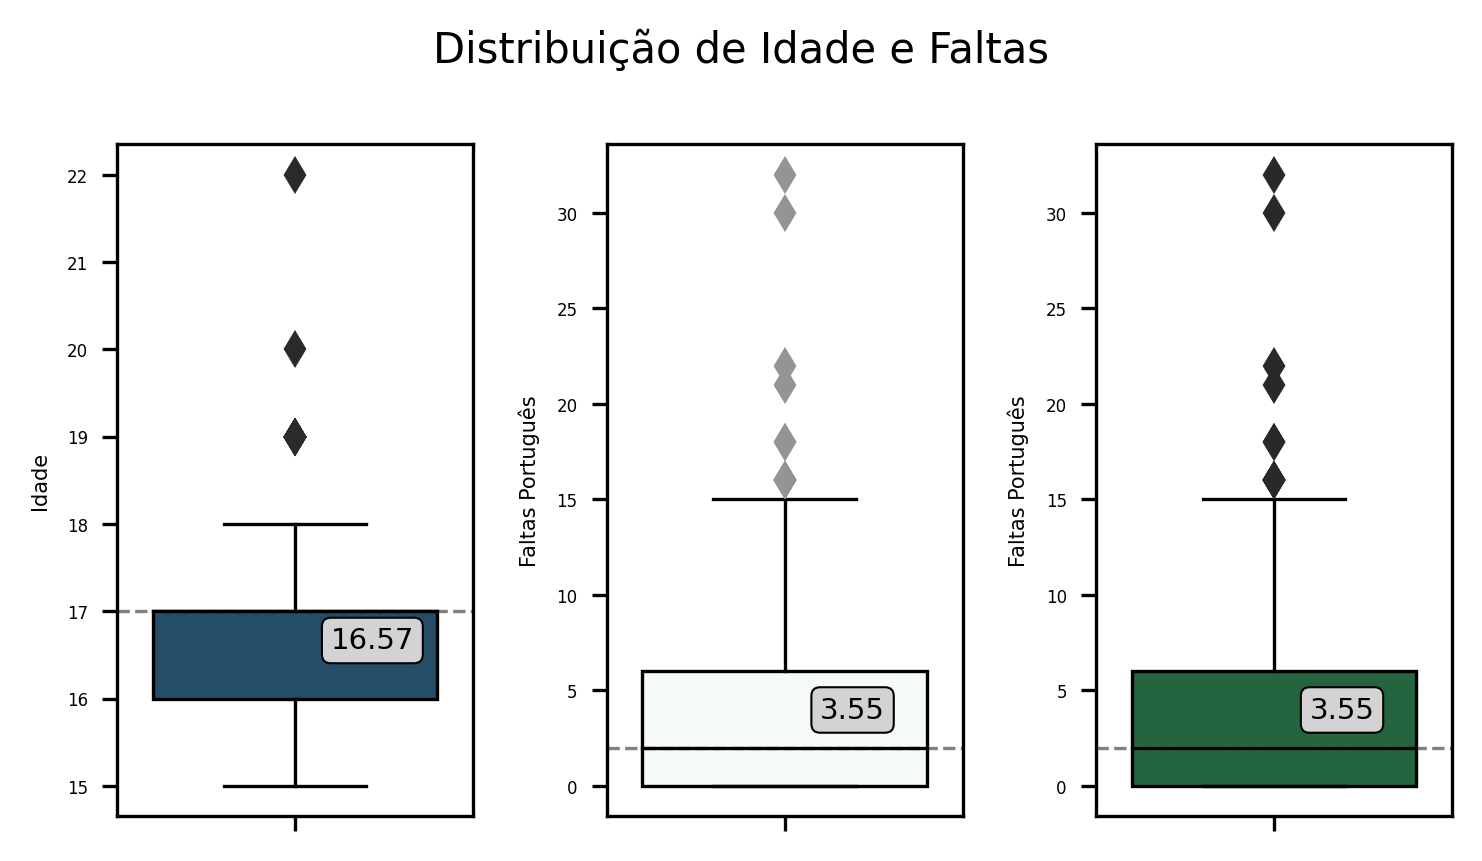

In [112]:
plot_distribuicao_quantitativas(df_merge,
    colunas=['idade','faltas_por','faltas_por'],
    paleta='blue_to_green',
    materia=None,
    mostrar_media=True,
    mostrar_mediana=True,
    modo='box'
)

**Distribuição de notas por idade**

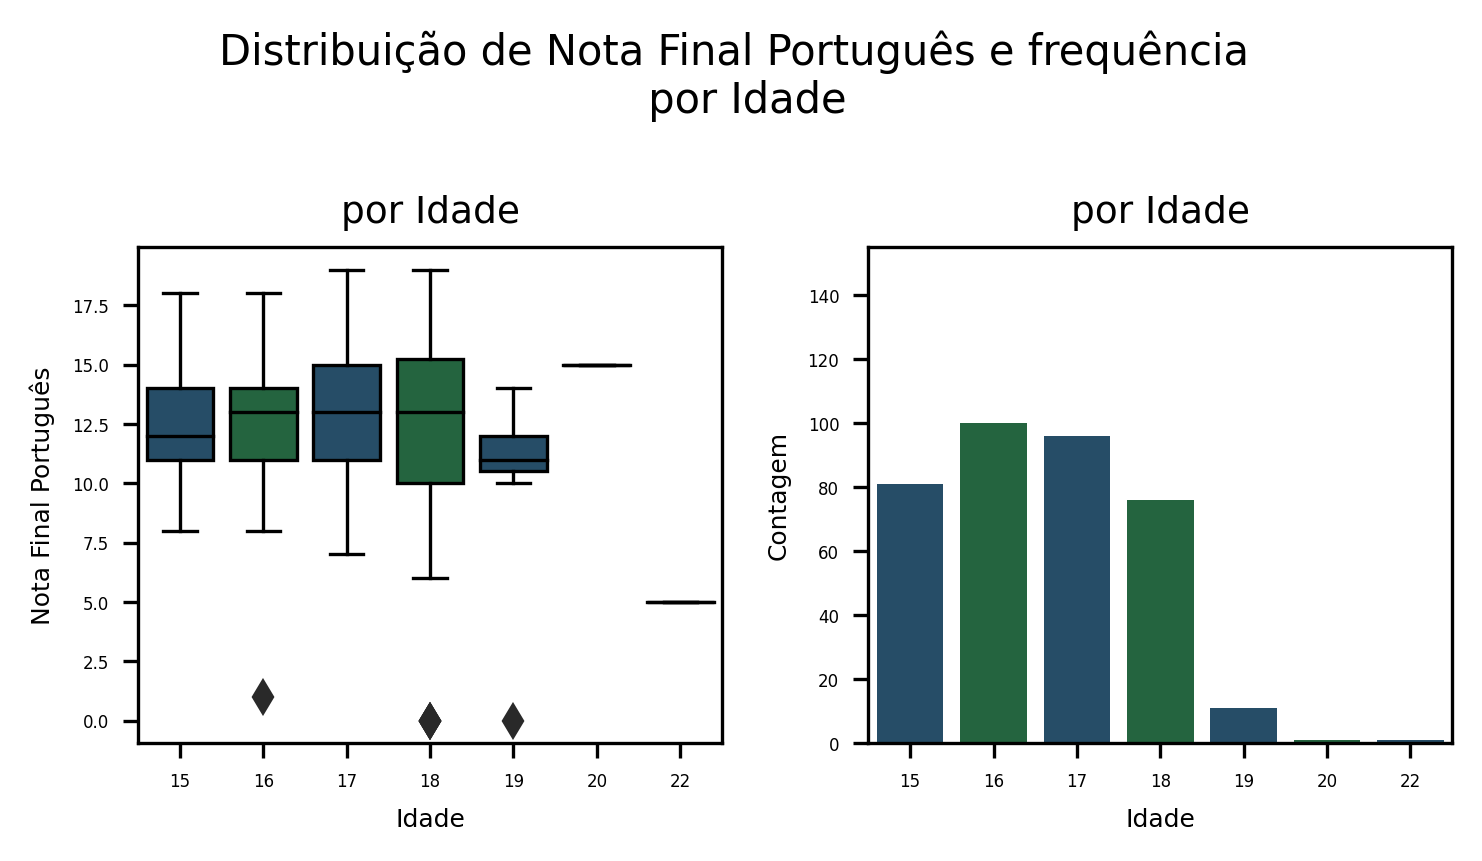

In [113]:
plot_boxplot_countplot(df_merge
                     ,hue=None
                     ,x = 'idade'
                     ,y='nota_final_por'
                     ,nome_arquivo='box_box_idadevsnota_por'
                     ,paleta='blue_to_green'
                     )



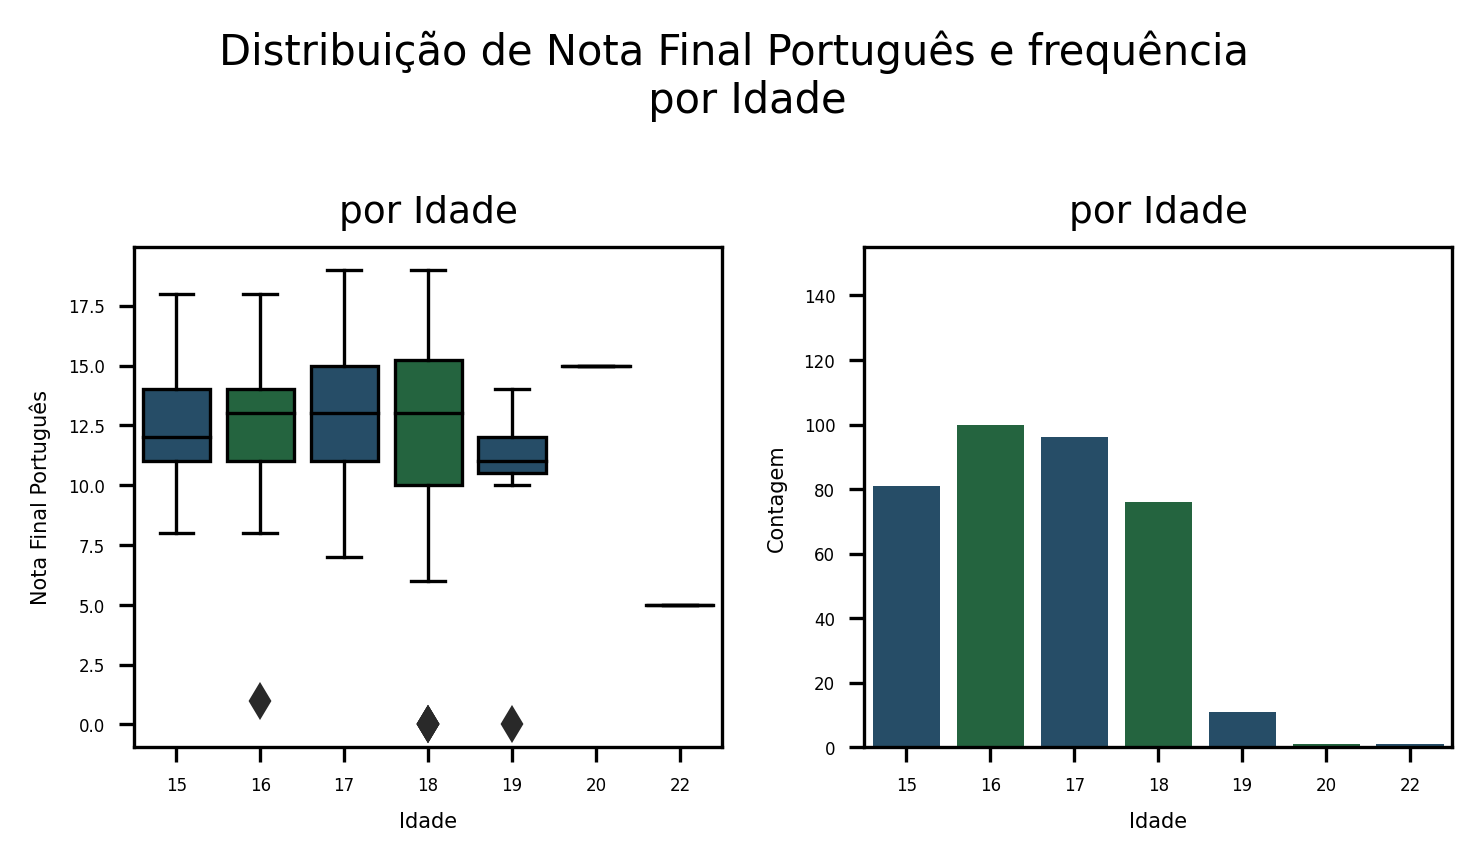

In [114]:
plot_boxplot_countplot(df_merge
                     ,hue=None
                     ,x = 'idade'
                     ,y='nota_final_por'
                     ,nome_arquivo='box_box_idadevsnota_mat'
                     ,paleta='blue_to_green'
                     )

**Notas 1**

(<Figure size 1512x864 with 2 Axes>,
 array([<AxesSubplot:ylabel='Nota1 Português'>,
        <AxesSubplot:ylabel='Nota1 Matemática'>], dtype=object))

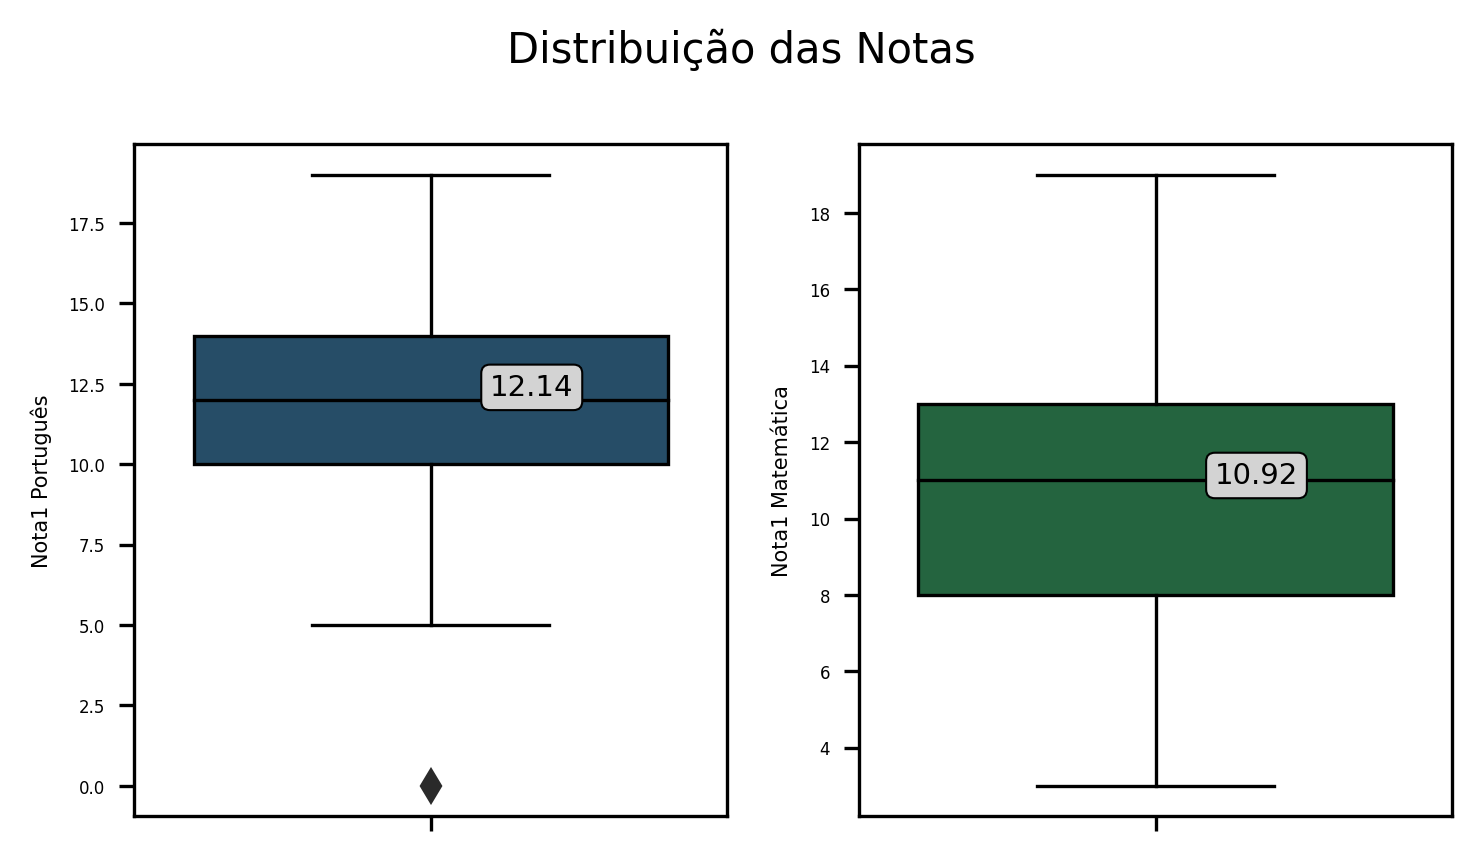

In [115]:
plot_distribuicao_quantitativas(df_merge,
    colunas=['nota1_por','nota1_mat'],
    paleta='blue_to_green',
    materia=None,
    mostrar_media=True,
)

**Notas 2**

(<Figure size 1512x864 with 2 Axes>,
 array([<AxesSubplot:ylabel='Nota2 Português'>,
        <AxesSubplot:ylabel='Nota2 Matemática'>], dtype=object))

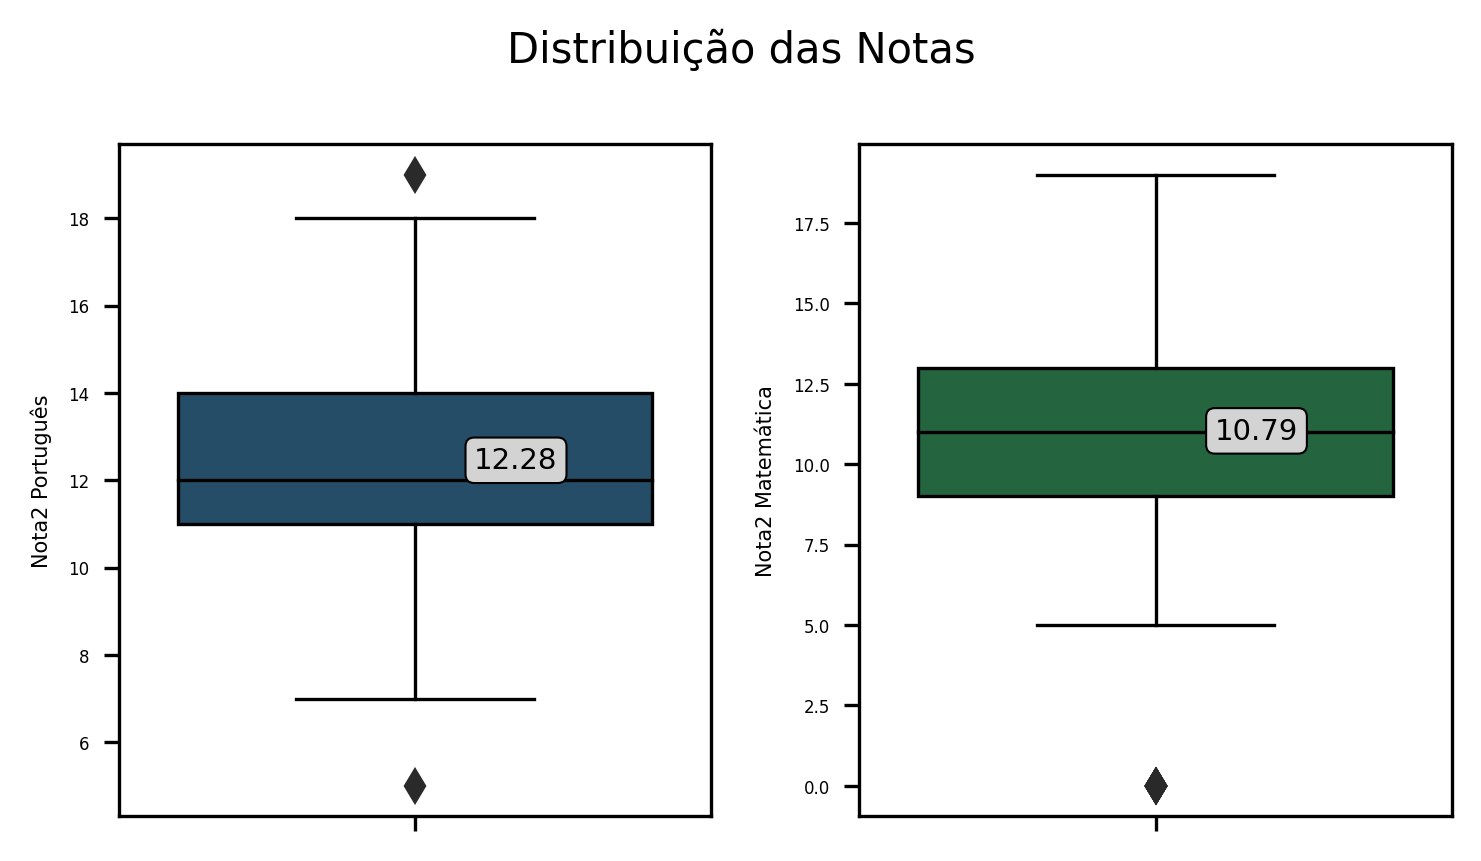

In [116]:
plot_distribuicao_quantitativas(df_merge,
    colunas=['nota2_por','nota2_mat'],
    paleta='blue_to_green',
    materia=None,
    mostrar_media=True,
)

**Nota Final**

(<Figure size 1512x864 with 2 Axes>,
 array([<AxesSubplot:ylabel='Nota Final Português'>,
        <AxesSubplot:ylabel='Nota Final Matemática'>], dtype=object))

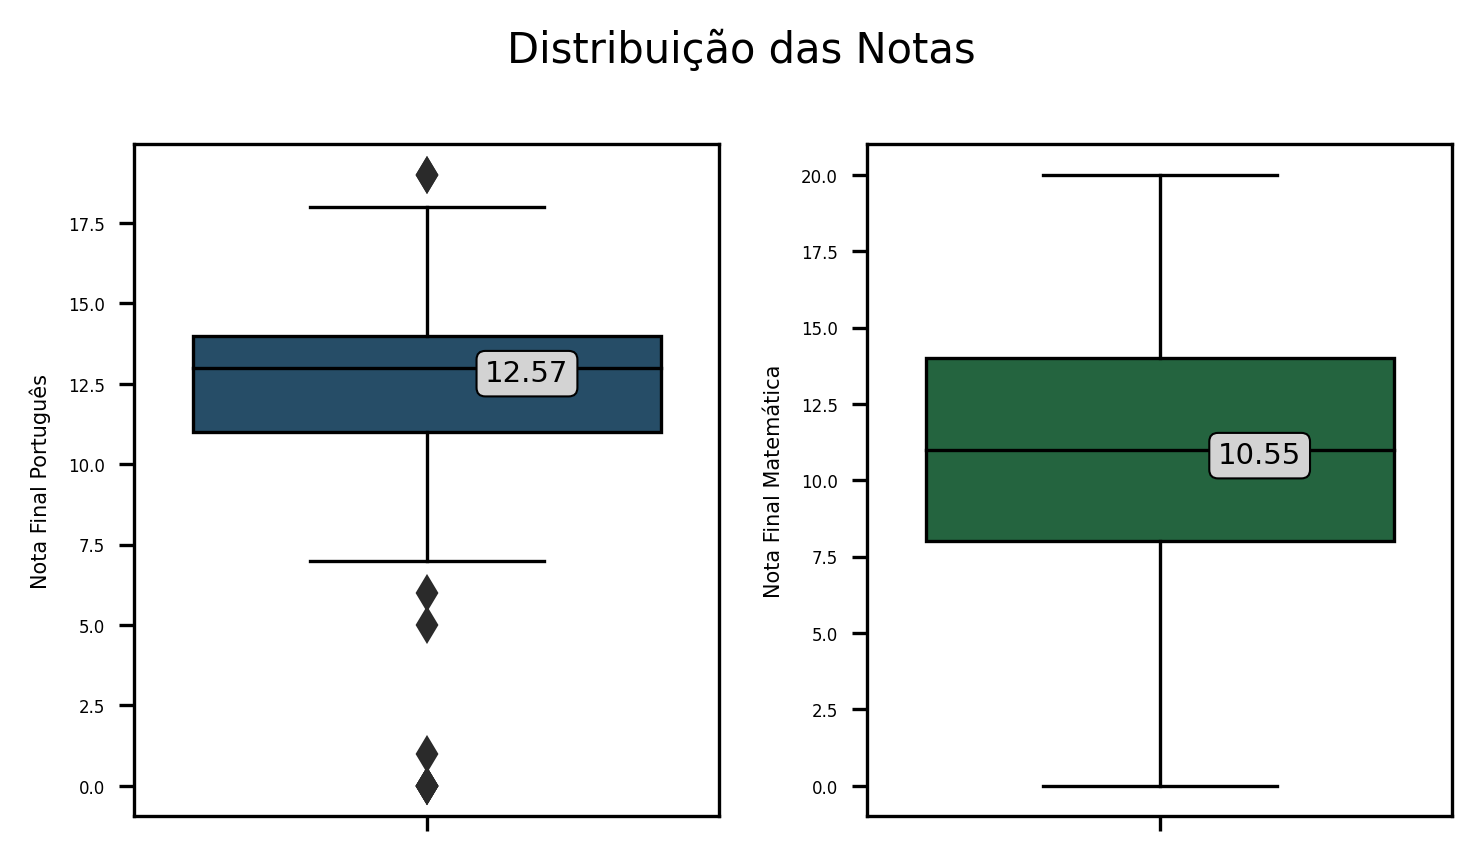

In [117]:
plot_distribuicao_quantitativas(df_merge,
    colunas=['nota_final_por','nota_final_mat'],
    paleta='blue_to_green',
    materia=None,
    mostrar_media=True,
)

#### **Comportamento das Notas ao longo do ano letivo**

**Português**

(<Figure size 1512x864 with 3 Axes>,
 array([<AxesSubplot:ylabel='Nota1 Português'>,
        <AxesSubplot:ylabel='Nota2 Português'>,
        <AxesSubplot:ylabel='Nota Final Português'>], dtype=object))

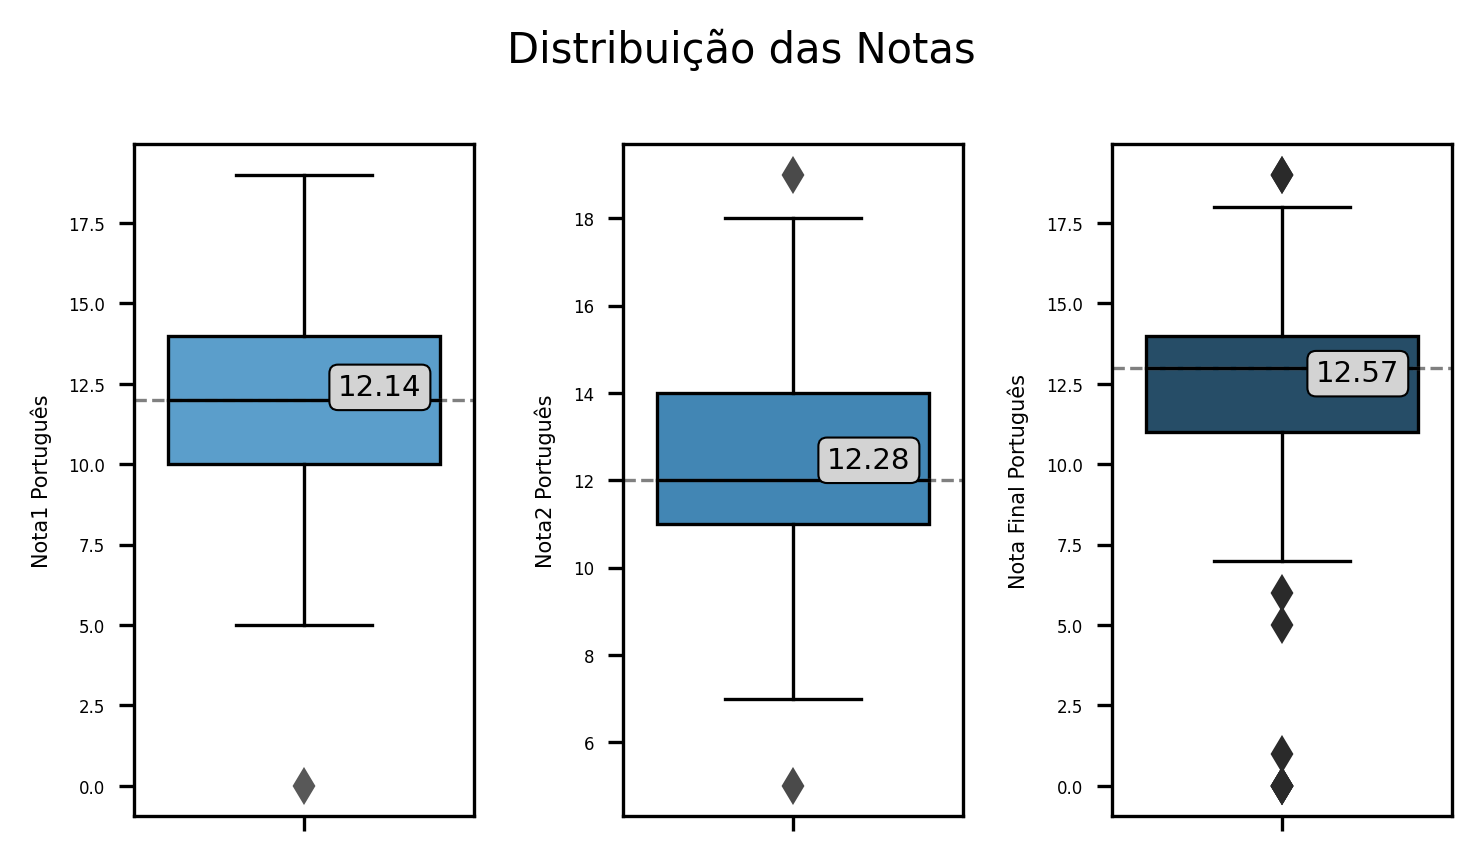

In [118]:
plot_distribuicao_quantitativas(df_merge,
    colunas=['nota1_por','nota2_por','nota_final_por'],
    paleta='azul',
    materia=None,
    mostrar_media=True,
    mostrar_mediana=True,
    modo='box'
)

(<Figure size 1512x864 with 3 Axes>,
 array([<AxesSubplot:xlabel='Nota1 Português', ylabel='Frequência'>,
        <AxesSubplot:xlabel='Nota2 Português', ylabel='Frequência'>,
        <AxesSubplot:xlabel='Nota Final Português', ylabel='Frequência'>],
       dtype=object))

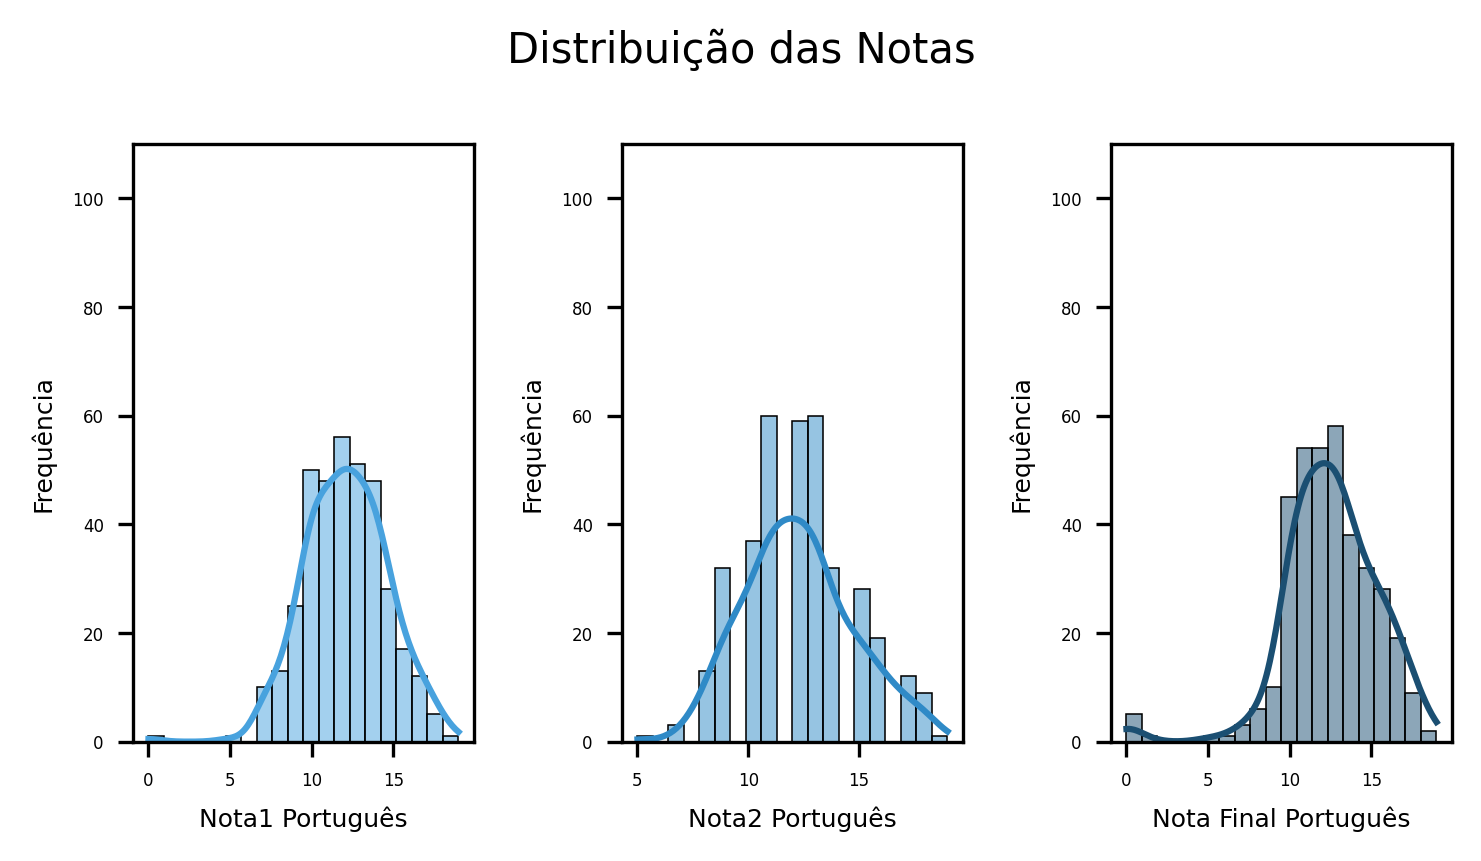

In [119]:
plot_distribuicao_quantitativas(df_merge,
    colunas=['nota1_por','nota2_por','nota_final_por'],
    paleta='azul',
    materia=None,
    mostrar_media=True,
    mostrar_mediana=True,
    modo='hist'
)

**Matemática**

(<Figure size 1512x864 with 3 Axes>,
 array([<AxesSubplot:ylabel='Nota1 Matemática'>,
        <AxesSubplot:ylabel='Nota2 Matemática'>,
        <AxesSubplot:ylabel='Nota Final Matemática'>], dtype=object))

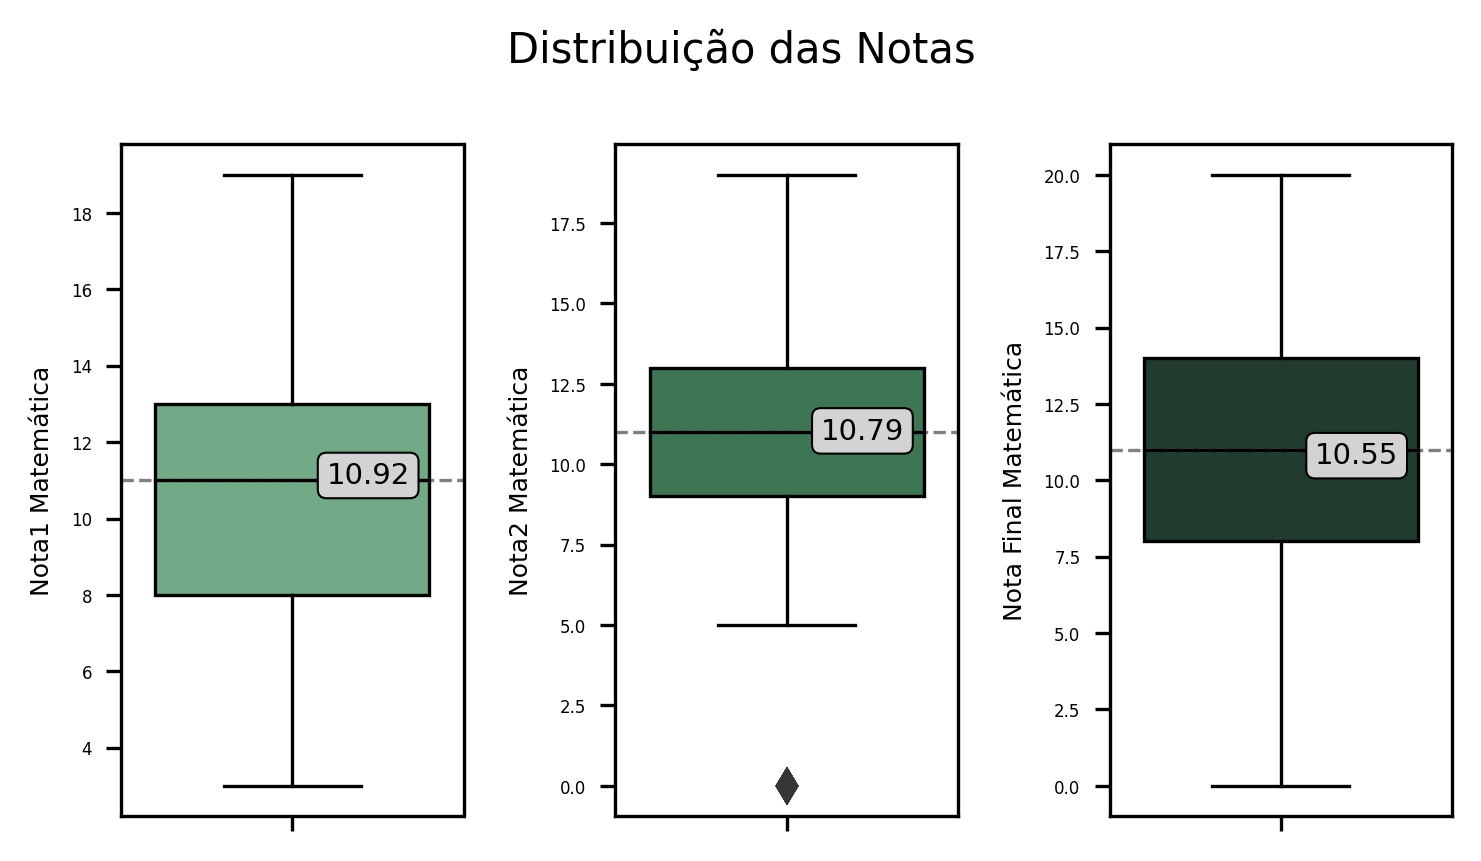

In [120]:
plot_distribuicao_quantitativas(df_merge,
    colunas=['nota1_mat','nota2_mat','nota_final_mat'],
    paleta='verde',
    materia=None,
    mostrar_media=True,
    mostrar_mediana=True,
    modo='box'
)

(<Figure size 1512x864 with 3 Axes>,
 array([<AxesSubplot:xlabel='Nota1 Matemática', ylabel='Frequência'>,
        <AxesSubplot:xlabel='Nota2 Matemática', ylabel='Frequência'>,
        <AxesSubplot:xlabel='Nota Final Matemática', ylabel='Frequência'>],
       dtype=object))

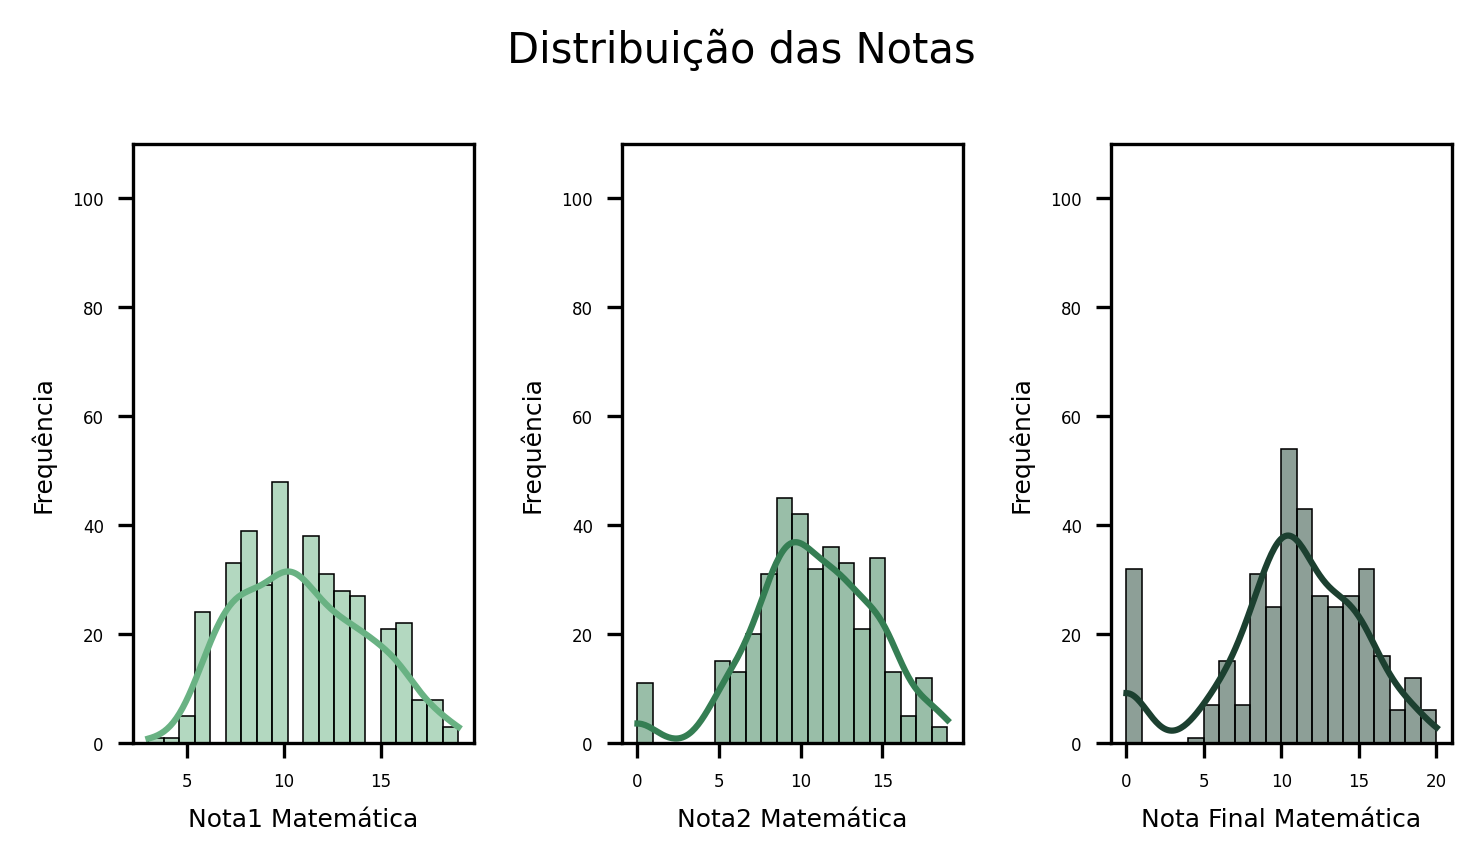

In [121]:
plot_distribuicao_quantitativas(df_merge,
    colunas=['nota1_mat','nota2_mat','nota_final_mat'],
    paleta='verde',
    materia=None,
    mostrar_media=True,
    mostrar_mediana=True,
    modo='hist'
)

## 2.1 Relações e correlações

c:\Users\laism\student_performance_tcc\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


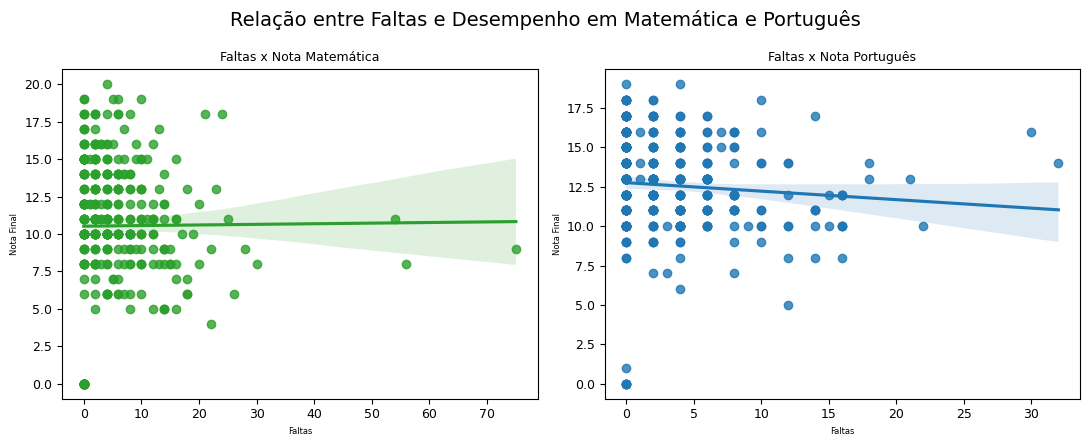

In [122]:
# Visualizando faltas e desempenho
plt.figure(figsize=(11, 4.5))
plt.suptitle("Relação entre Faltas e Desempenho em Matemática e Português", fontsize=14)

plt.subplot(1, 2, 1)
sns.regplot(x=df_merge["faltas_mat"], y=df_merge["nota_final_mat"], color="#2ca02c")  # Verde
plt.title("Faltas x Nota Matemática")
plt.xlabel("Faltas")
plt.ylabel("Nota Final")
plt.xticks(fontsize=9)  
plt.yticks( fontsize=9) 

plt.subplot(1, 2, 2)
sns.regplot(df_merge["faltas_por"], df_merge["nota_final_por"], color="#1f77b4")  # blue_to_green
plt.title("Faltas x Nota Português")
plt.xlabel("Faltas")
plt.ylabel("Nota Final")
plt.xticks( fontsize=9)  
plt.yticks( fontsize=9)  

plt.tight_layout()
plt.show()


In [123]:
corr_quant = df_merge[notas].corr(method= 'spearman')


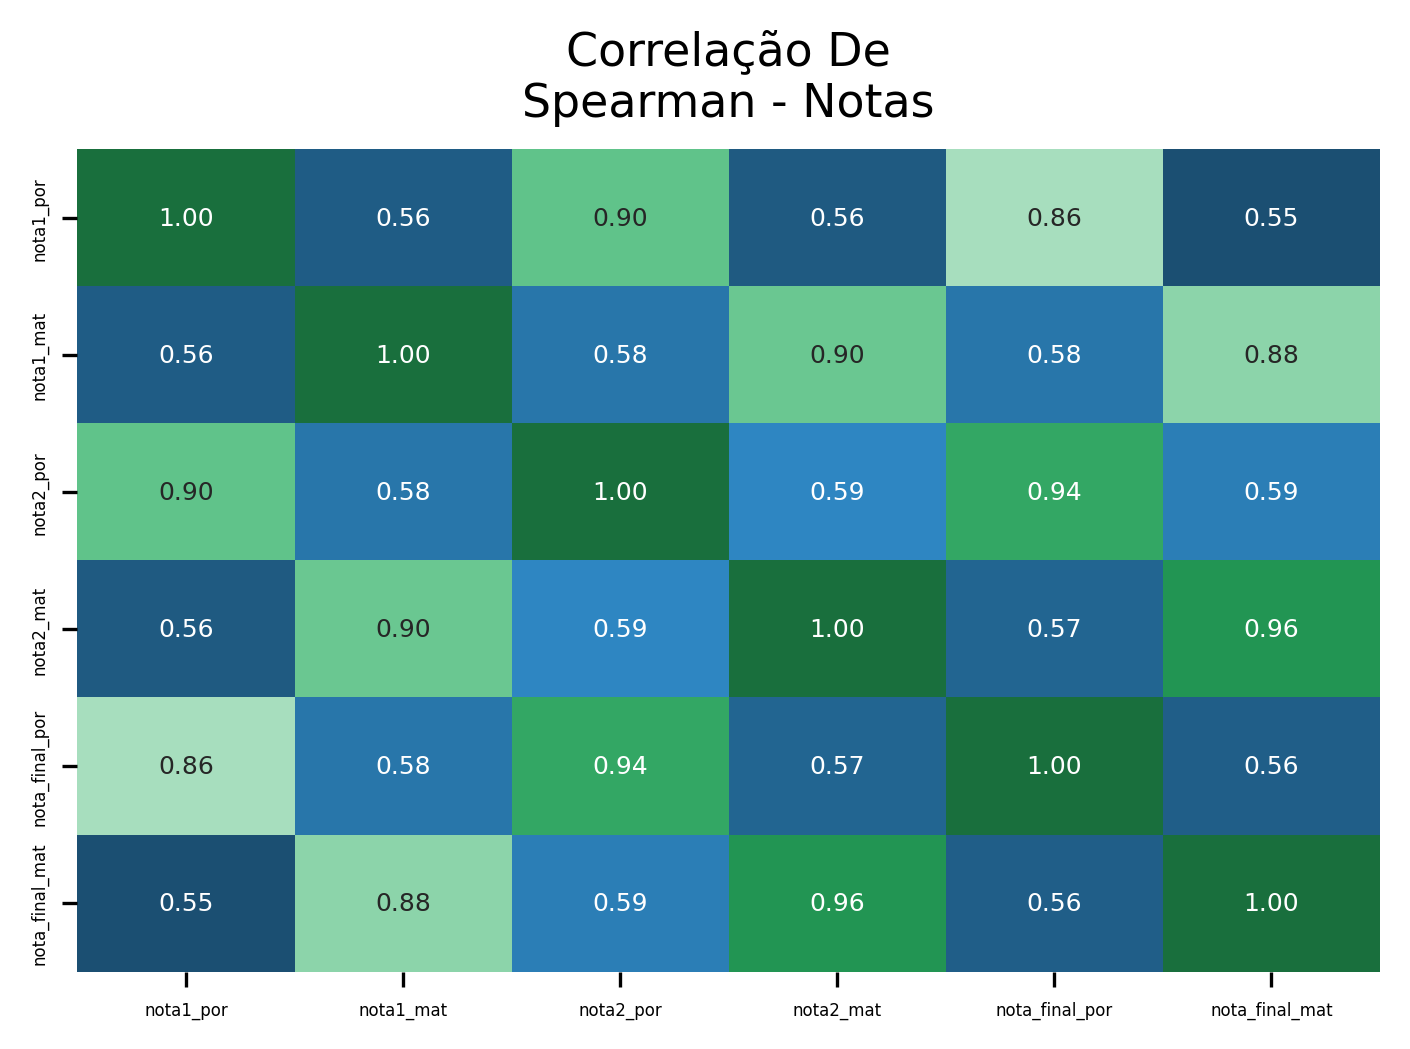

In [124]:
custom_heatmap(matriz_corr = corr_quant,
               cores = 'blue_to_green',
               n_arq ='heatmap_qualitativas',
               titulo = 'Correlação de Spearman - Notas' ,
               disciplina=None)

Figura salva em: imagens\analise_bivariada\comparativo_por_mat.png


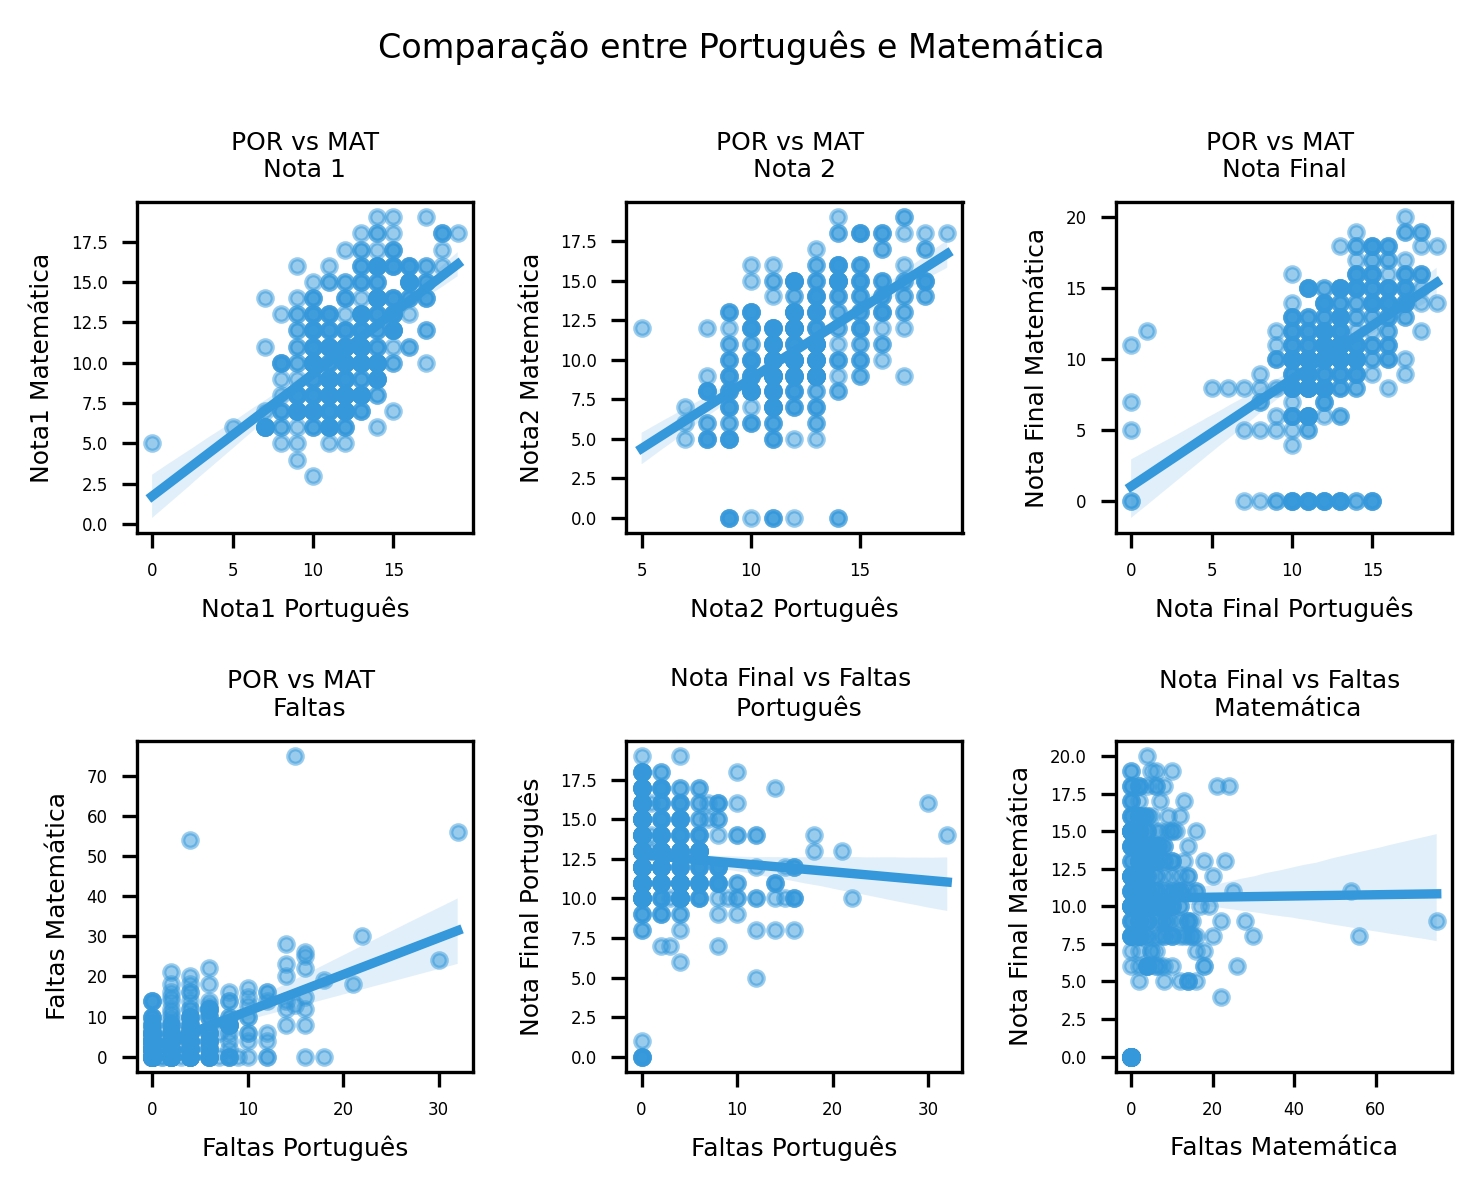

In [125]:
comparar_notas_faltas(df_merge, cor='blue_to_green', dir='analise_bivariada')

# 3. Variáveis Categóricas e Desempenho Acadêmico

## 3.1 Variáveis Categóricas Ordinais

In [126]:
desc_ord = add_features_describe_pd(df_merge,variaveis_categoricas_ordinais,shapiro_values= False)

Tamanho da amostra: 366.0


In [127]:
desc_ord

,Média,Desvio Padrão,Mínimo,1º Quartil (25%),Mediana (50%),3º Quartil (75%),Máximo,Moda,Coeficiente de Variação (CV)
relacao_familiar_por,3.939891,0.901563,1.0,4.0,4.0,5.0,5.0,4,0.228829
tempo_livre_por,3.232240,0.980997,1.0,3.0,3.0,4.0,5.0,3,0.303504
frequencia_saidas_por,3.117486,1.127427,1.0,2.0,3.0,4.0,5.0,3,0.361646
saude_por,3.562842,1.410387,1.0,3.0,4.0,5.0,5.0,5,0.395860
tempo_estudo_por,2.051913,0.847258,1.0,1.0,2.0,2.0,4.0,2,0.412911
tempo_transporte_por,1.453552,0.707514,1.0,1.0,1.0,2.0,4.0,1,0.486749
alcool_dias_uteis_por,1.486339,0.899668,1.0,1.0,1.0,2.0,5.0,1,0.605291
alcool_fim_semana_por,2.308743,1.297112,1.0,1.0,2.0,3.0,5.0,1,0.561826
reprovacoes_por,0.139344,0.501760,0.0,0.0,0.0,0.0,3.0,0,3.600864
relacao_familiar_mat,3.934426,0.913260,1.0,4.0,4.0,5.0,5.0,4,0.232120


In [128]:
desc_ord_freq =add_features_describe_pd(df_merge,variaveis_categoricas_ordinais,estudo_frequencia=True)
desc_ord_freq

Tamanho da amostra: 366


,Total de Categorias,Categoria Mais Comum(CMC),Frequência Absoluta CMC,Frequência Relativa CMC (%),Diversidade de Categorias (%),Entropia (Shannon)
relacao_familiar_por,5,4,178,48.63388,1.36612,1.778823
tempo_livre_por,5,3,151,41.256831,1.36612,1.993738
frequencia_saidas_por,5,3,119,32.513661,1.36612,2.151188
saude_por,5,5,139,37.978142,1.36612,2.168569
tempo_estudo_por,4,2,184,50.273224,1.092896,1.708959
tempo_transporte_por,4,1,238,65.027322,1.092896,1.277132
alcool_dias_uteis_por,5,1,255,69.672131,1.36612,1.329420
alcool_fim_semana_por,5,1,139,37.978142,1.36612,2.134014
reprovacoes_por,4,0,333,90.983607,1.092896,0.555068
relacao_familiar_mat,5,4,178,48.63388,1.36612,1.787246


### 3.1.1 Correlações

In [129]:
corr_ord = df_merge[variaveis_categoricas_ordinais].corr(method= 'spearman')


In [130]:
# Deixa em formato long (tabela), com pares de variáveis
corr_long = corr_ord.where(np.tril(np.ones(corr_ord.shape), k=-1).astype(bool)).stack().reset_index()
corr_long.columns = ['Variável 1', 'Variável 2', 'Correlação']



In [131]:
#====visão geral


def classificar_intensidade(r):
    a = abs(r)
    if a < 0.10:
        return 'Descorrelacionado'
    elif a < 0.30:
        return 'Fraco'
    elif a < 0.50:
        return 'Moderado'
    elif a < 0.70:
        return 'Forte'
    elif a < 0.90:
        return 'Muito forte'
    else:
        return 'Altíssimo'
    
def classificar_tipo(r):
    if r < 0:
        return 'negativa'
    else:
        return 'positiva'


# Aplica a classificação
corr_long['Tipo'] = corr_long['Correlação'].apply(classificar_tipo)
corr_long['Força da Correlação'] = corr_long['Correlação'].apply(classificar_intensidade)

# Conta por categoria
resumo = corr_long[['Tipo','Força da Correlação']].value_counts().sort_index()


print('''
Critérios de Força correlacional:
      
     -   Descorrelacionado: coef < 0.10:
     -   Fraco: coef < 0.30
     -   Moderado: coef < 0.5
     -   Forte: coef < 0.7
     -   Muito forte: coef < 0.9
     -   Altíssimo: coef > 0.90
    
      
Resumo quantitativos das Correlações:''')
resumo.T.reset_index()


Critérios de Força correlacional:
      
     -   Descorrelacionado: coef < 0.10:
     -   Fraco: coef < 0.30
     -   Moderado: coef < 0.5
     -   Forte: coef < 0.7
     -   Muito forte: coef < 0.9
     -   Altíssimo: coef > 0.90
    
      
Resumo quantitativos das Correlações:


,Tipo,Força da Correlação,0
0,negativa,Descorrelacionado,35
1,negativa,Fraco,36
2,positiva,Altíssimo,8
3,positiva,Descorrelacionado,65
4,positiva,Forte,6
5,positiva,Fraco,36
6,positiva,Moderado,4


In [132]:
resumo

Tipo      Força da Correlação
negativa  Descorrelacionado      35
          Fraco                  36
positiva  Altíssimo               8
          Descorrelacionado      65
          Forte                   6
          Fraco                  36
          Moderado                4
dtype: int64

In [133]:
print('10 maiores indices correlação')
corr_long.sort_values(by= 'Correlação',ascending=False).head(10)

10 maiores indices correlação


,Variável 1,Variável 2,Correlação,Tipo,Força da Correlação
36,relacao_familiar_mat,relacao_familiar_por,0.999595,positiva,Altíssimo
96,tempo_transporte_mat,tempo_transporte_por,0.999381,positiva,Altíssimo
69,saude_mat,saude_por,0.998687,positiva,Altíssimo
127,alcool_fim_semana_mat,alcool_fim_semana_por,0.997214,positiva,Altíssimo
111,alcool_dias_uteis_mat,alcool_dias_uteis_por,0.995068,positiva,Altíssimo
82,tempo_estudo_mat,tempo_estudo_por,0.988059,positiva,Altíssimo
46,tempo_livre_mat,tempo_livre_por,0.987931,positiva,Altíssimo
57,frequencia_saidas_mat,frequencia_saidas_por,0.980275,positiva,Altíssimo
135,alcool_fim_semana_mat,alcool_dias_uteis_mat,0.658314,positiva,Forte
112,alcool_dias_uteis_mat,alcool_fim_semana_por,0.654124,positiva,Forte


In [134]:
print('5 Maiores Indices de correlação negativa')
corr_long.sort_values(by= 'Correlação',ascending=True).head()

5 Maiores Indices de correlação negativa


,Variável 1,Variável 2,Correlação,Tipo,Força da Correlação
124,alcool_fim_semana_mat,tempo_estudo_por,-0.274267,negativa,Fraco
25,alcool_fim_semana_por,tempo_estudo_por,-0.271363,negativa,Fraco
85,tempo_estudo_mat,alcool_fim_semana_por,-0.271306,negativa,Fraco
133,alcool_fim_semana_mat,tempo_estudo_mat,-0.270833,negativa,Fraco
170,escolaridade_mae,reprovacoes_mat,-0.223568,negativa,Fraco


In [135]:
print('correlações negativas com coef > 0.15')
corr_long[(corr_long['Correlação'].abs() > 0.15) & (corr_long['Correlação'] < 0)]


correlações negativas com coef > 0.15


,Variável 1,Variável 2,Correlação,Tipo,Força da Correlação
19,alcool_dias_uteis_por,tempo_estudo_por,-0.214103,negativa,Fraco
25,alcool_fim_semana_por,tempo_estudo_por,-0.271363,negativa,Fraco
32,reprovacoes_por,tempo_estudo_por,-0.198601,negativa,Fraco
84,tempo_estudo_mat,alcool_dias_uteis_por,-0.211039,negativa,Fraco
85,tempo_estudo_mat,alcool_fim_semana_por,-0.271306,negativa,Fraco
86,tempo_estudo_mat,reprovacoes_por,-0.196909,negativa,Fraco
109,alcool_dias_uteis_mat,tempo_estudo_por,-0.214567,negativa,Fraco
118,alcool_dias_uteis_mat,tempo_estudo_mat,-0.211524,negativa,Fraco
124,alcool_fim_semana_mat,tempo_estudo_por,-0.274267,negativa,Fraco
133,alcool_fim_semana_mat,tempo_estudo_mat,-0.270833,negativa,Fraco


In [136]:
pares_comparaveis = []
for col in corr_ord.columns:
    if col.endswith('_por'):
        base = col[:-4]
        correspondente = base + '_mat'
        if correspondente in corr_ord.columns:
            r = corr_ord.loc[col, correspondente]
            pares_comparaveis.append((col, correspondente, r))


df_pares = pd.DataFrame(pares_comparaveis, columns=['Variável POR', 'Variável MAT', 'Correlação'])

limiar = 0.7
df_pares_baixa_correlacao = df_pares[df_pares['Correlação'].abs() < limiar]


In [137]:

print('Variáveis que apresentam não apresentam forte correlação português vs matemática \nLimiar definido: 0.7')
df_pares_baixa_correlacao


Variáveis que apresentam não apresentam forte correlação português vs matemática 
Limiar definido: 0.7


,Variável POR,Variável MAT,Correlação
8,reprovacoes_por,reprovacoes_mat,0.55153


In [138]:
# Manter apenas cruzamentos entre _por e _mat
corr_long = corr_long[
    corr_long['Variável 1'].str.endswith('_por') & corr_long['Variável 2'].str.endswith('_mat') |
    corr_long['Variável 1'].str.endswith('_mat') & corr_long['Variável 2'].str.endswith('_por')
]


In [139]:
corr_filtrada = corr_long[corr_long['Correlação'].abs() <= 0.3]
print('Variáveis de baixa correlação ou descorrelacionadas')
corr_filtrada


Variáveis de baixa correlação ou descorrelacionadas


,Variável 1,Variável 2,Correlação,Tipo,Força da Correlação
37,relacao_familiar_mat,tempo_livre_por,0.103700,positiva,Fraco
38,relacao_familiar_mat,frequencia_saidas_por,0.026825,positiva,Descorrelacionado
39,relacao_familiar_mat,saude_por,0.091069,positiva,Descorrelacionado
40,relacao_familiar_mat,tempo_estudo_por,0.058290,positiva,Descorrelacionado
41,relacao_familiar_mat,tempo_transporte_por,-0.029582,negativa,Descorrelacionado
42,relacao_familiar_mat,alcool_dias_uteis_por,-0.121349,negativa,Fraco
43,relacao_familiar_mat,alcool_fim_semana_por,-0.138257,negativa,Fraco
44,relacao_familiar_mat,reprovacoes_por,-0.028663,negativa,Descorrelacionado
45,tempo_livre_mat,relacao_familiar_por,0.119137,positiva,Fraco
47,tempo_livre_mat,frequencia_saidas_por,0.273958,positiva,Fraco


### 5.2 Variáveis Categóricas Nominais

In [140]:
desc_nom =add_features_describe_pd(df_merge,variaveis_categoricas_nominais,estudo_frequencia=True)
desc_nom

Tamanho da amostra: 366


,Total de Categorias,Categoria Mais Comum(CMC),Frequência Absoluta CMC,Frequência Relativa CMC (%),Diversidade de Categorias (%),Entropia (Shannon)
responsavel_legal_por,3,Mãe,263,71.857923,0.819672,1.032717
apoio_escolar_por,2,Não,317,86.612022,0.546448,0.567983
apoio_familiar_por,2,Sim,229,62.568306,0.546448,0.953929
aulas_particulares_por,2,Não,341,93.169399,0.546448,0.359570
atividades_extracurriculares_por,2,Sim,188,51.36612,0.546448,0.999461
intencao_superior_por,2,Sim,351,95.901639,0.546448,0.246784
relacionamento_romantico_por,2,Não,247,67.486339,0.546448,0.909880
responsavel_legal_mat,3,Mãe,263,71.857923,0.819672,1.032717
apoio_escolar_mat,2,Não,317,86.612022,0.546448,0.567983
apoio_familiar_mat,2,Sim,228,62.295082,0.546448,0.955931


## 3.4 Relação Categorica com Desempenho Escolar


In [141]:
variaveis_categoricas = variaveis_categoricas_nominais + variaveis_categoricas_ordinais

In [142]:
variaveis_categoricas = identificadores_oficiais
variaveis_categoricas.remove('idade')


### 3.4.1 Distribuição por Categoria

##### **Nota 1**

Figura salva em: imagens\figuras\genero_desempenho_fraco.png.png
Figura salva em: imagens\figuras\escolaridade_mae_desempenho_fraco.png.png
Figura salva em: imagens\figuras\escolaridade_pai_desempenho_fraco.png.png
Figura salva em: imagens\figuras\profissao_mae_desempenho_fraco.png.png
Figura salva em: imagens\figuras\profissao_pai_desempenho_fraco.png.png
Figura salva em: imagens\figuras\motivo_escolha_escola_desempenho_fraco.png.png


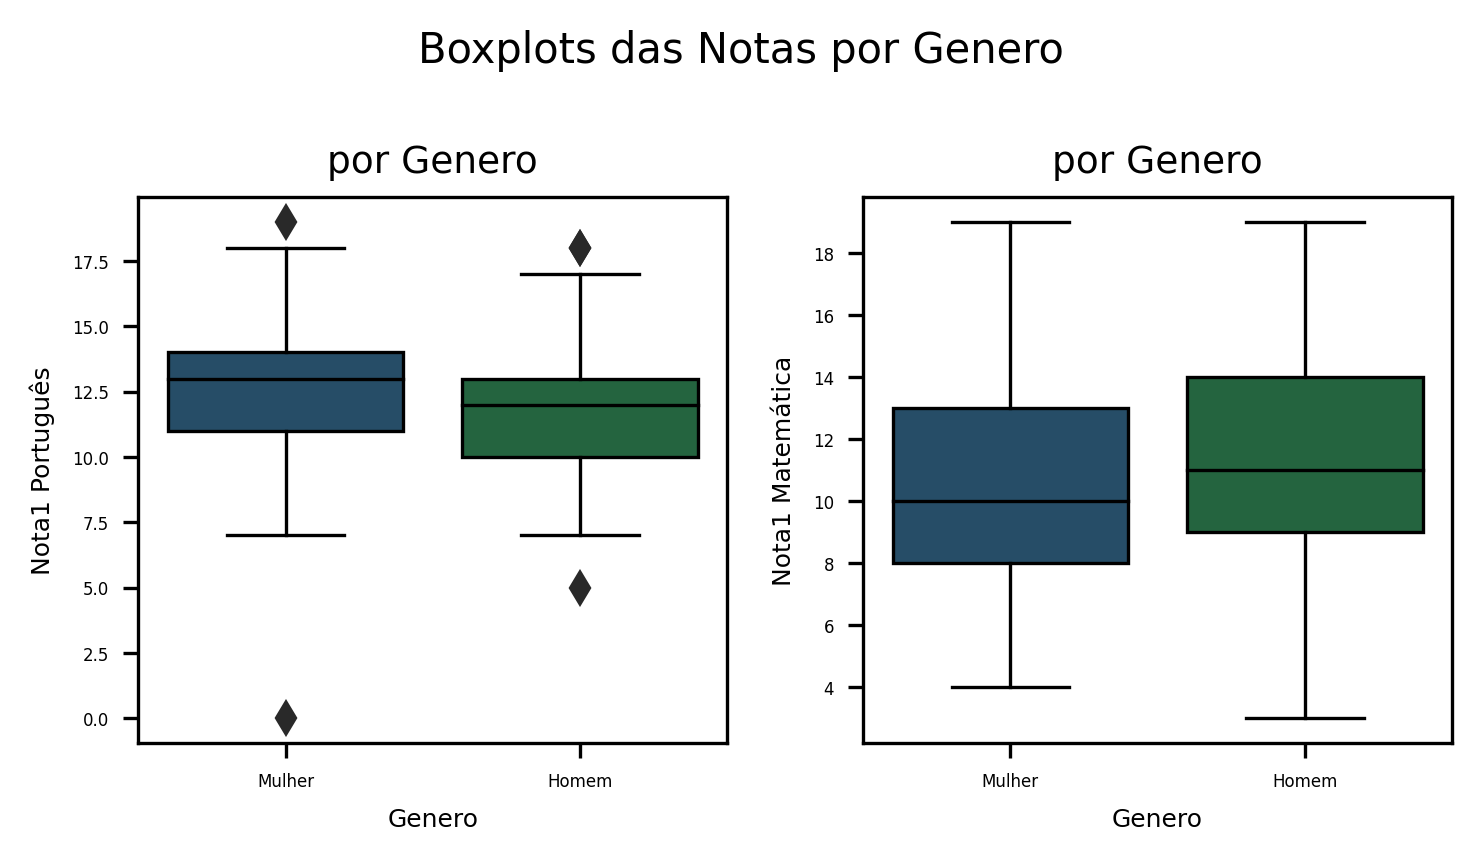

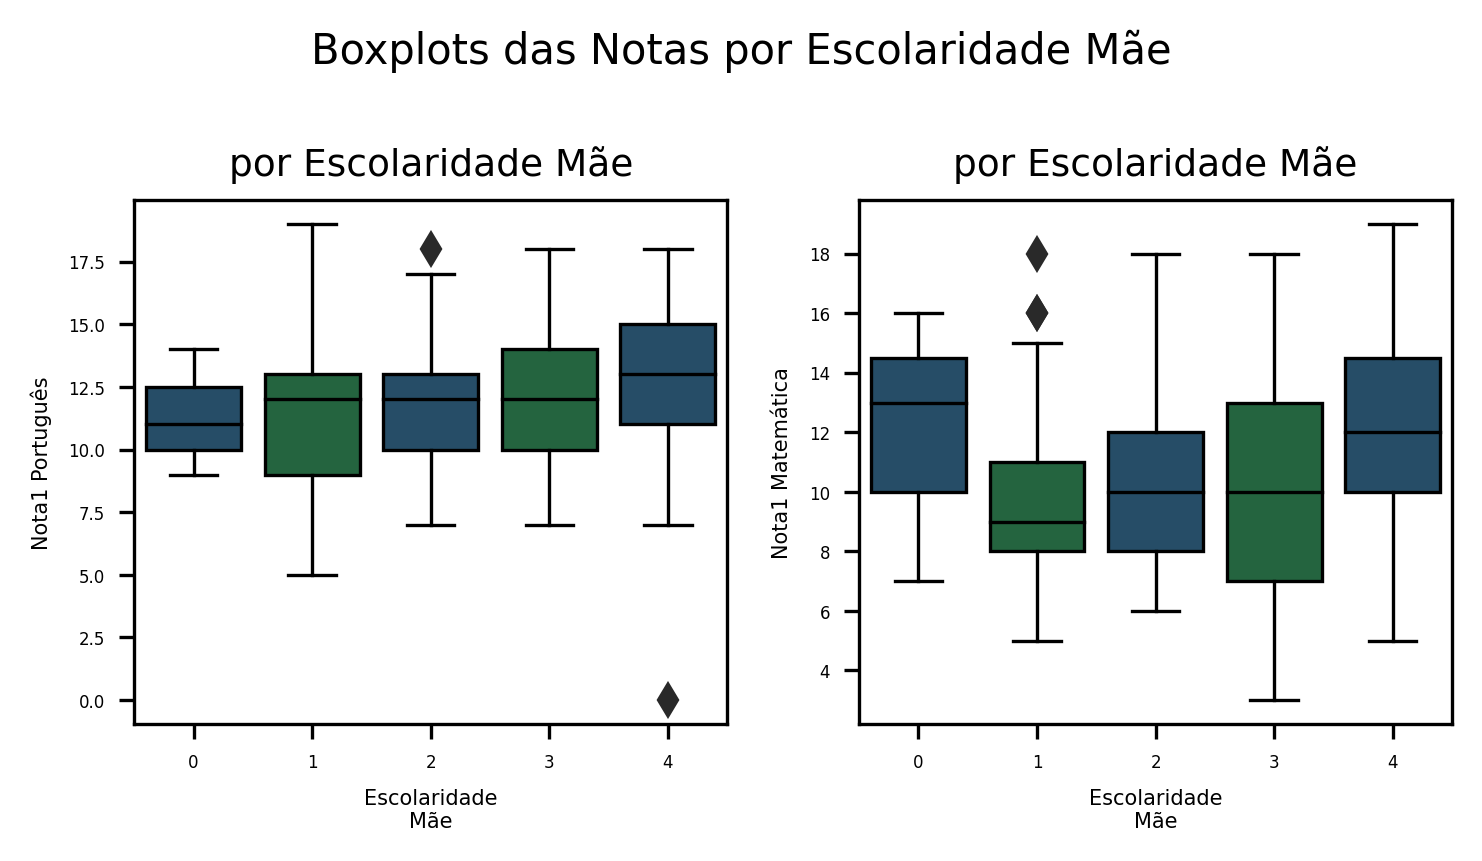

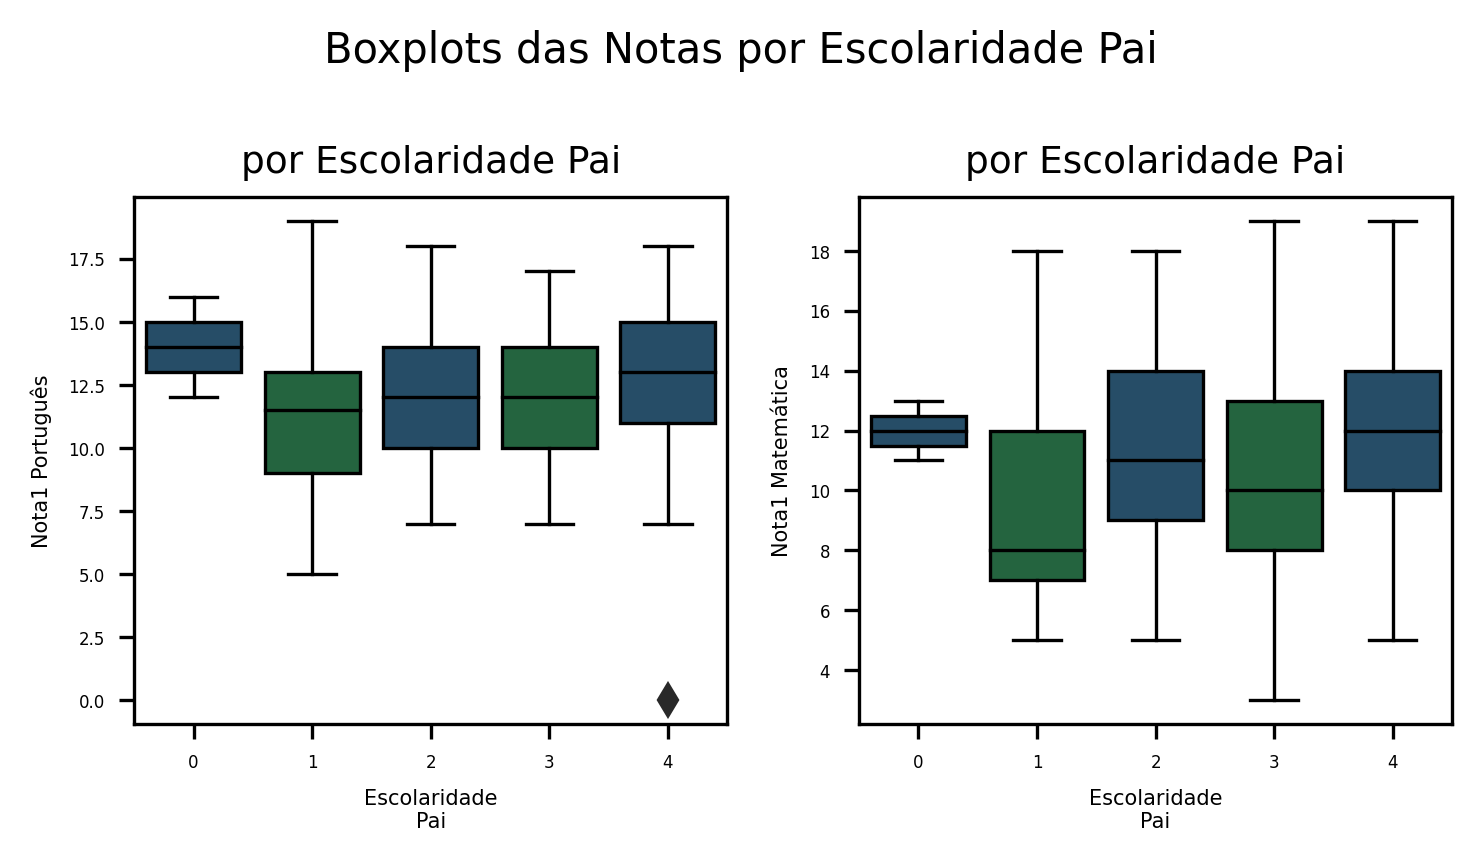

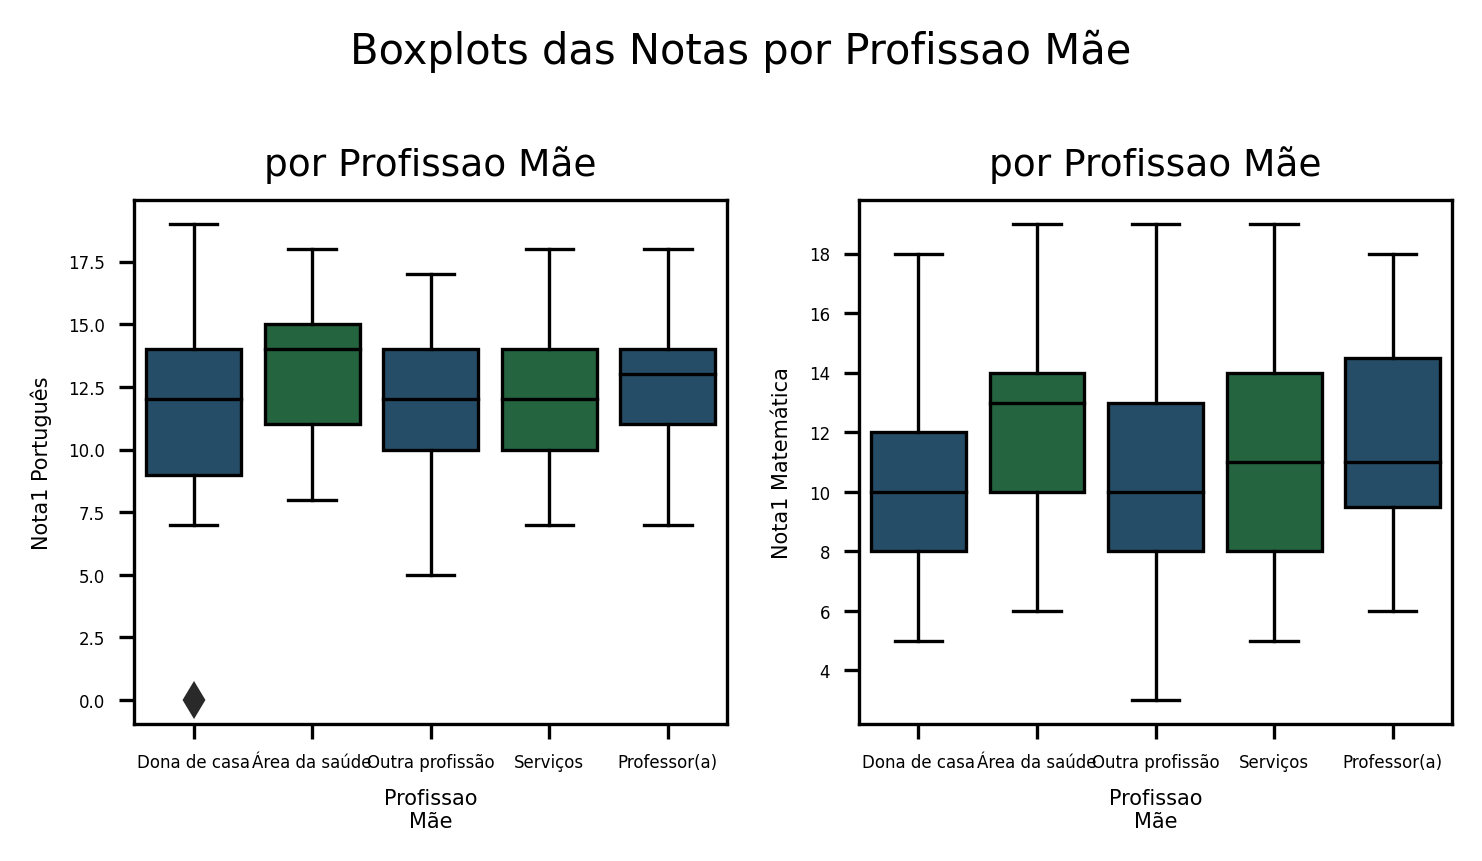

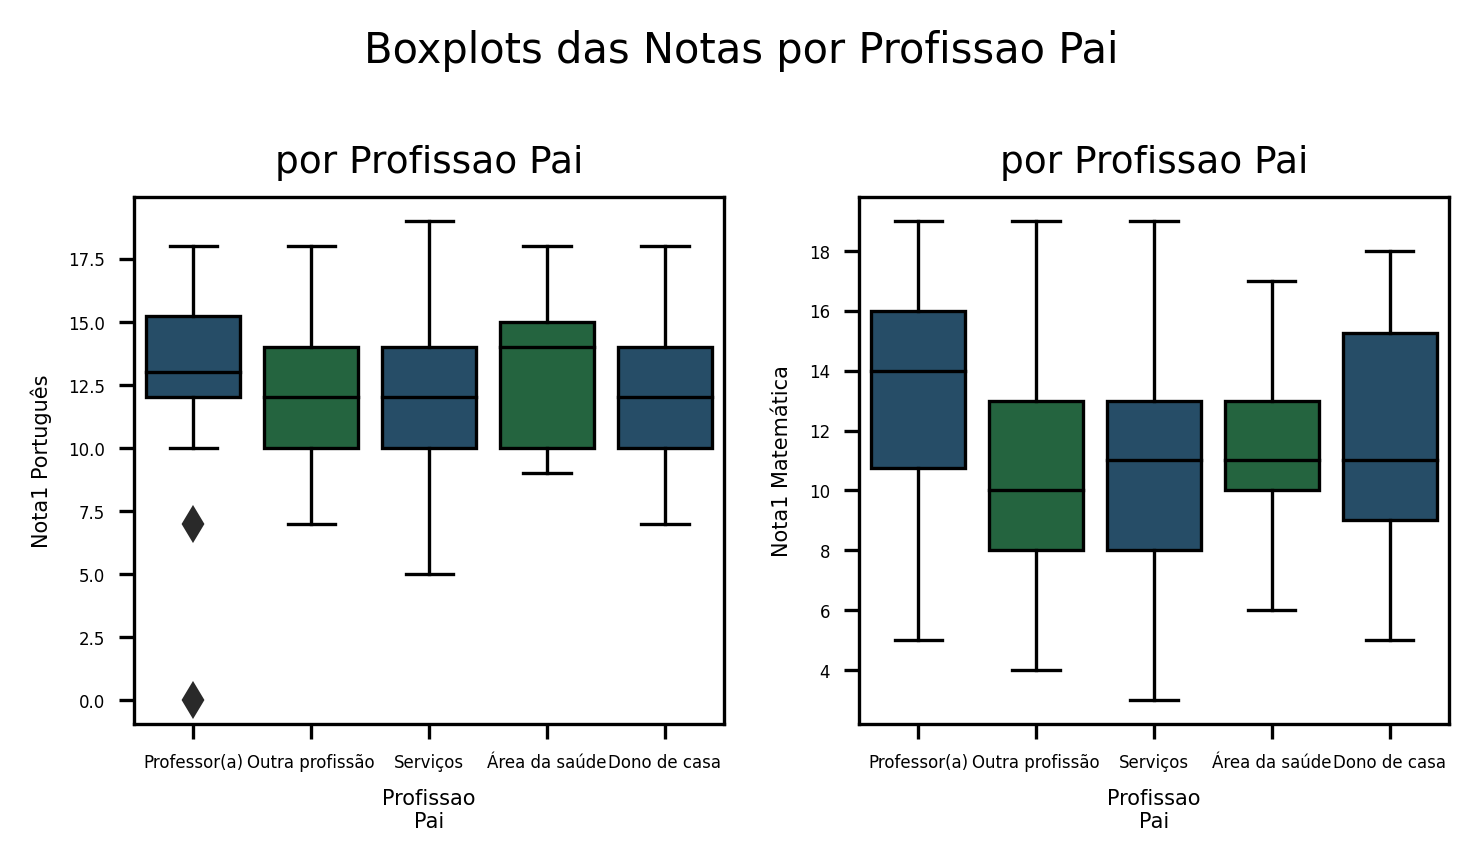

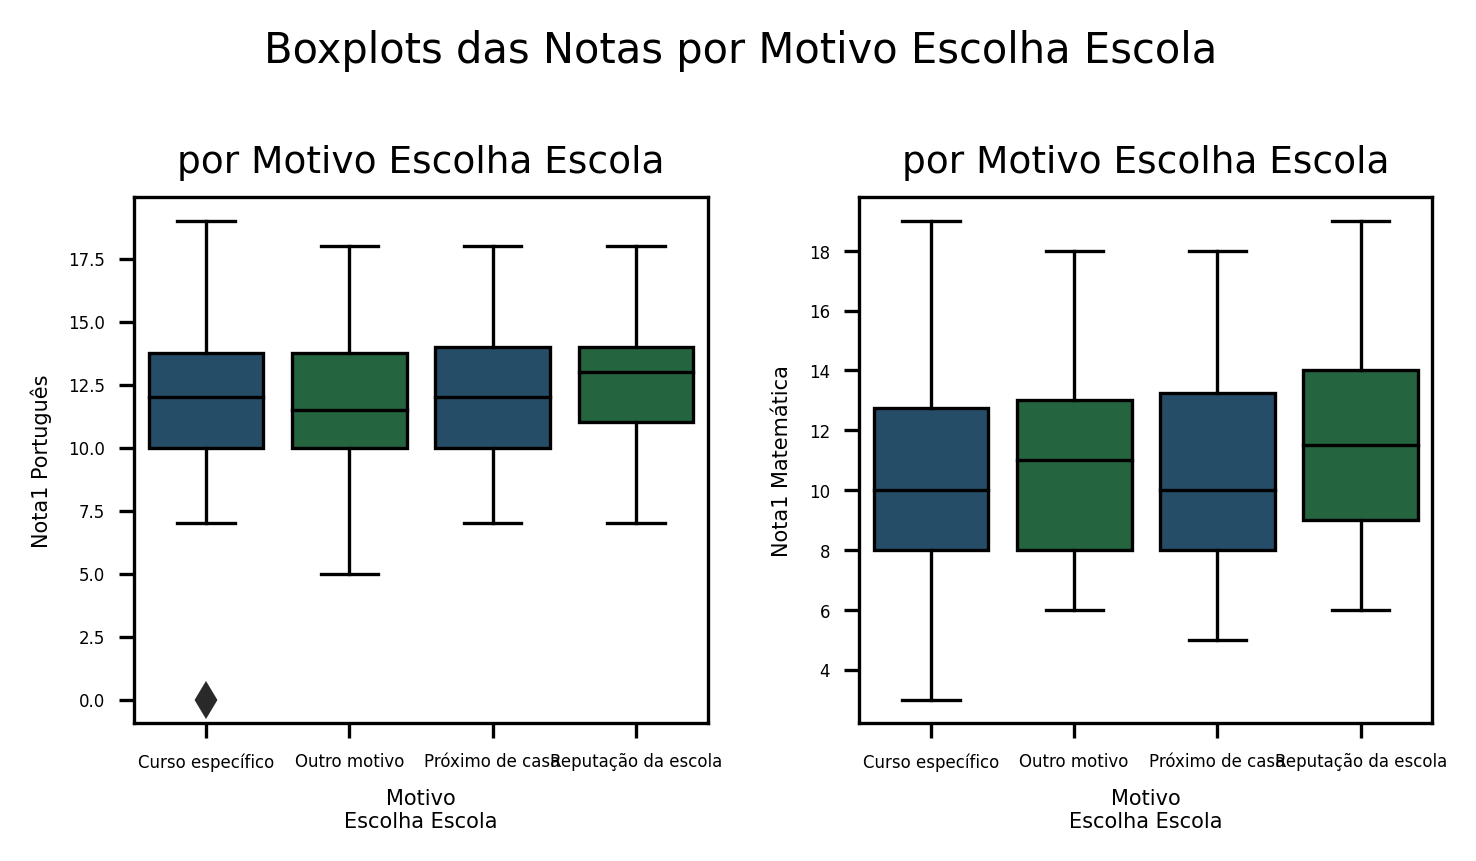

In [143]:
selecao_impacto_variaveis_categoricas(df_merge, 
                                    variaveis_categoricas,
                                    paleta='blue_to_green',
                                    coluna_avaliada='nota1'
                                    )

##### **Nota 2**

Figura salva em: imagens\figuras\genero_desempenho_fraco.png.png
Figura salva em: imagens\figuras\escolaridade_mae_desempenho_fraco.png.png
Figura salva em: imagens\figuras\escolaridade_pai_desempenho_fraco.png.png
Figura salva em: imagens\figuras\profissao_mae_desempenho_fraco.png.png
Figura salva em: imagens\figuras\profissao_pai_desempenho_fraco.png.png
Figura salva em: imagens\figuras\motivo_escolha_escola_desempenho_fraco.png.png


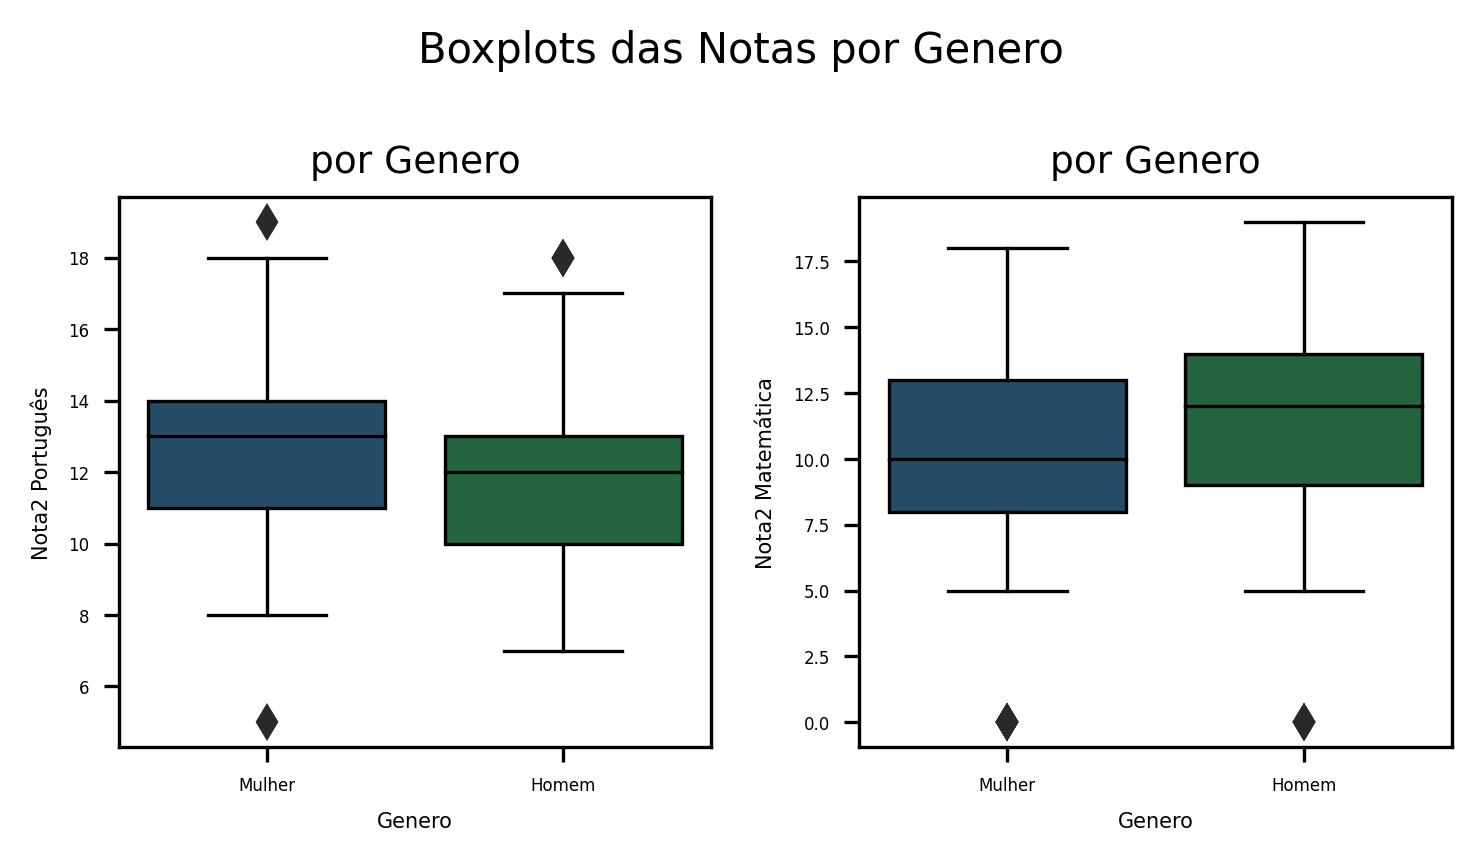

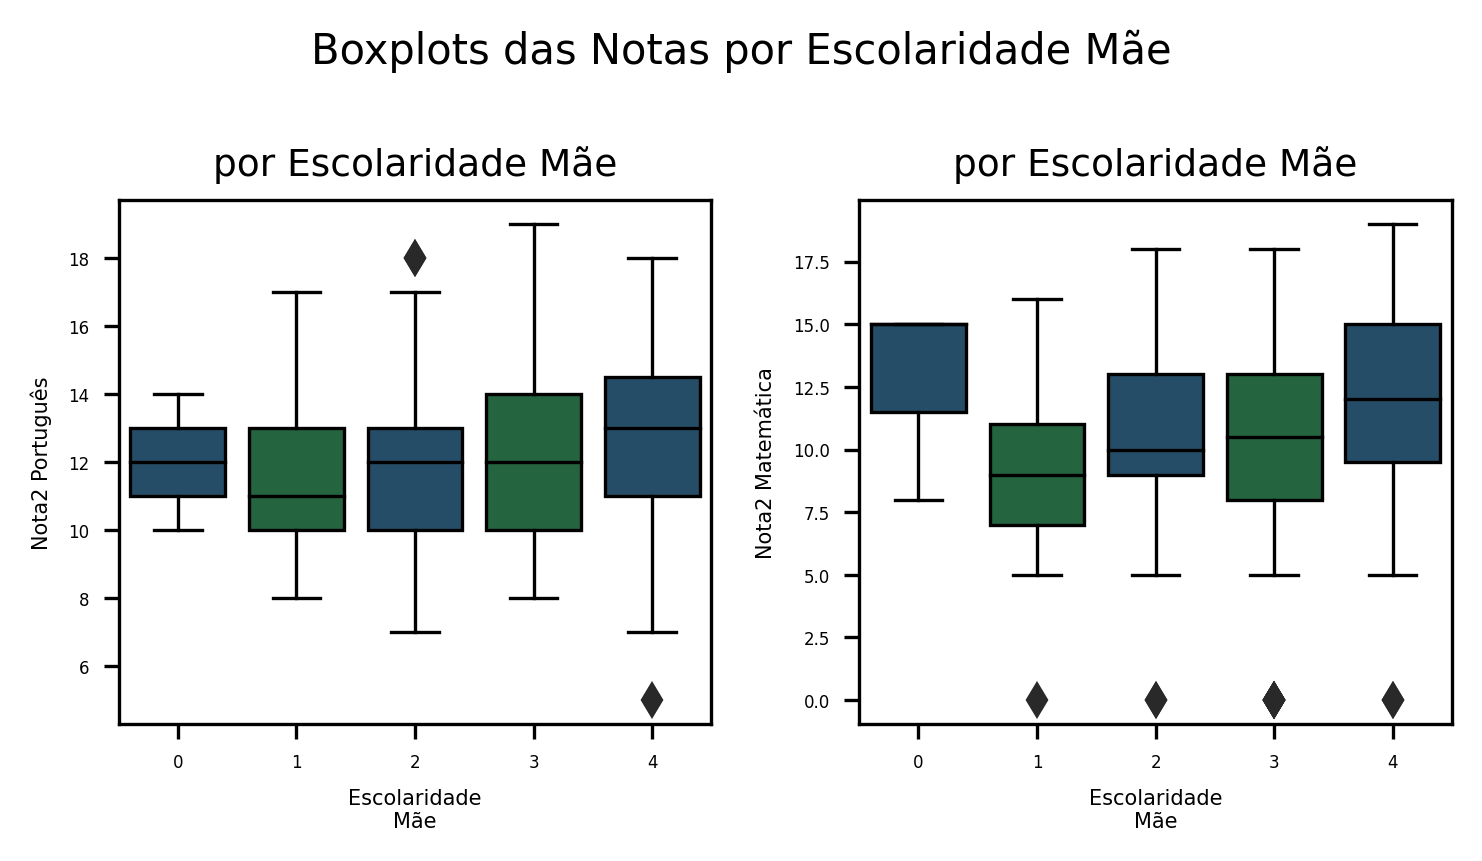

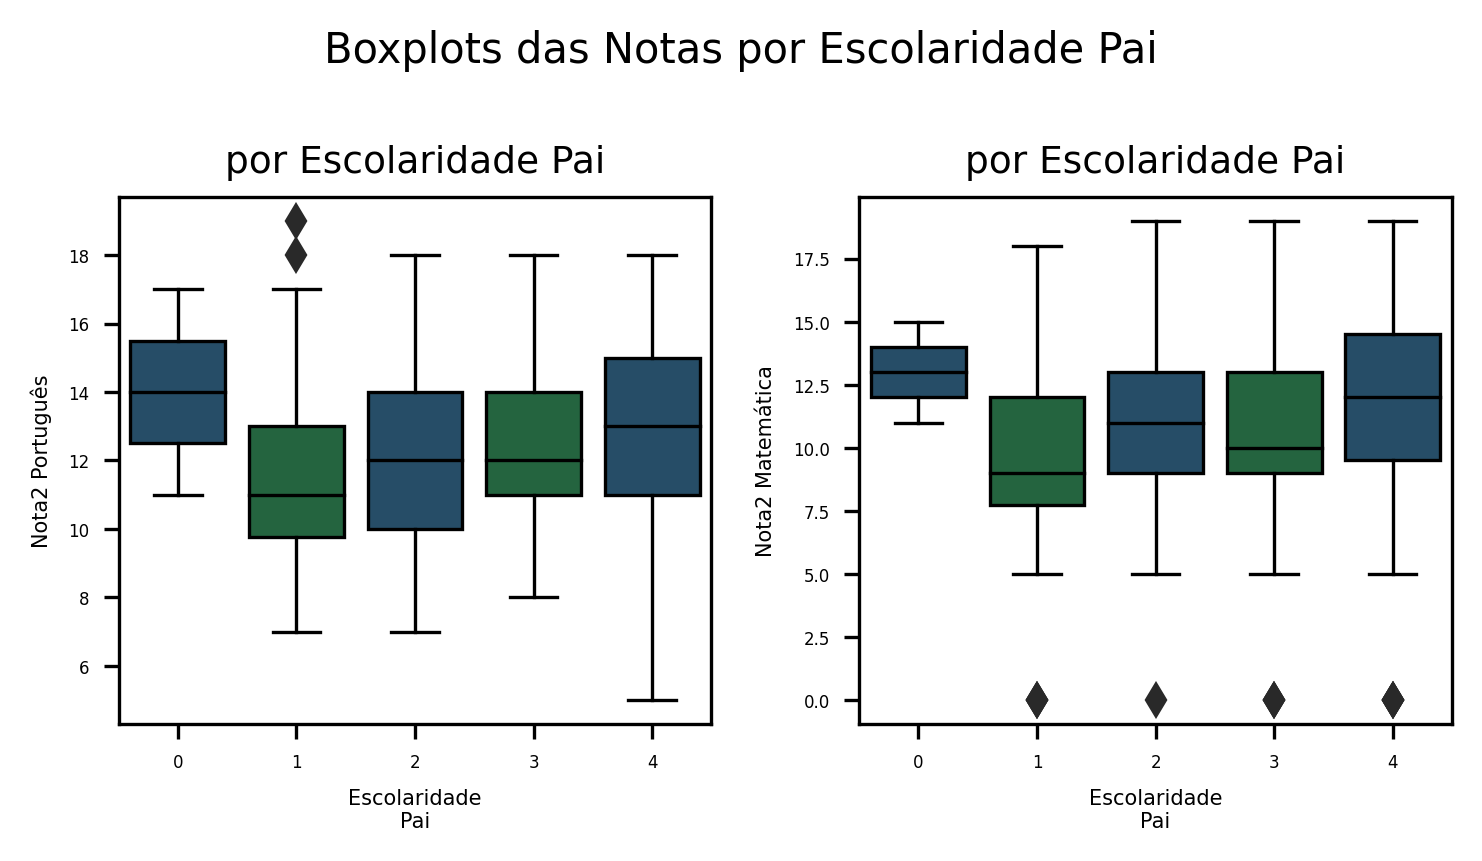

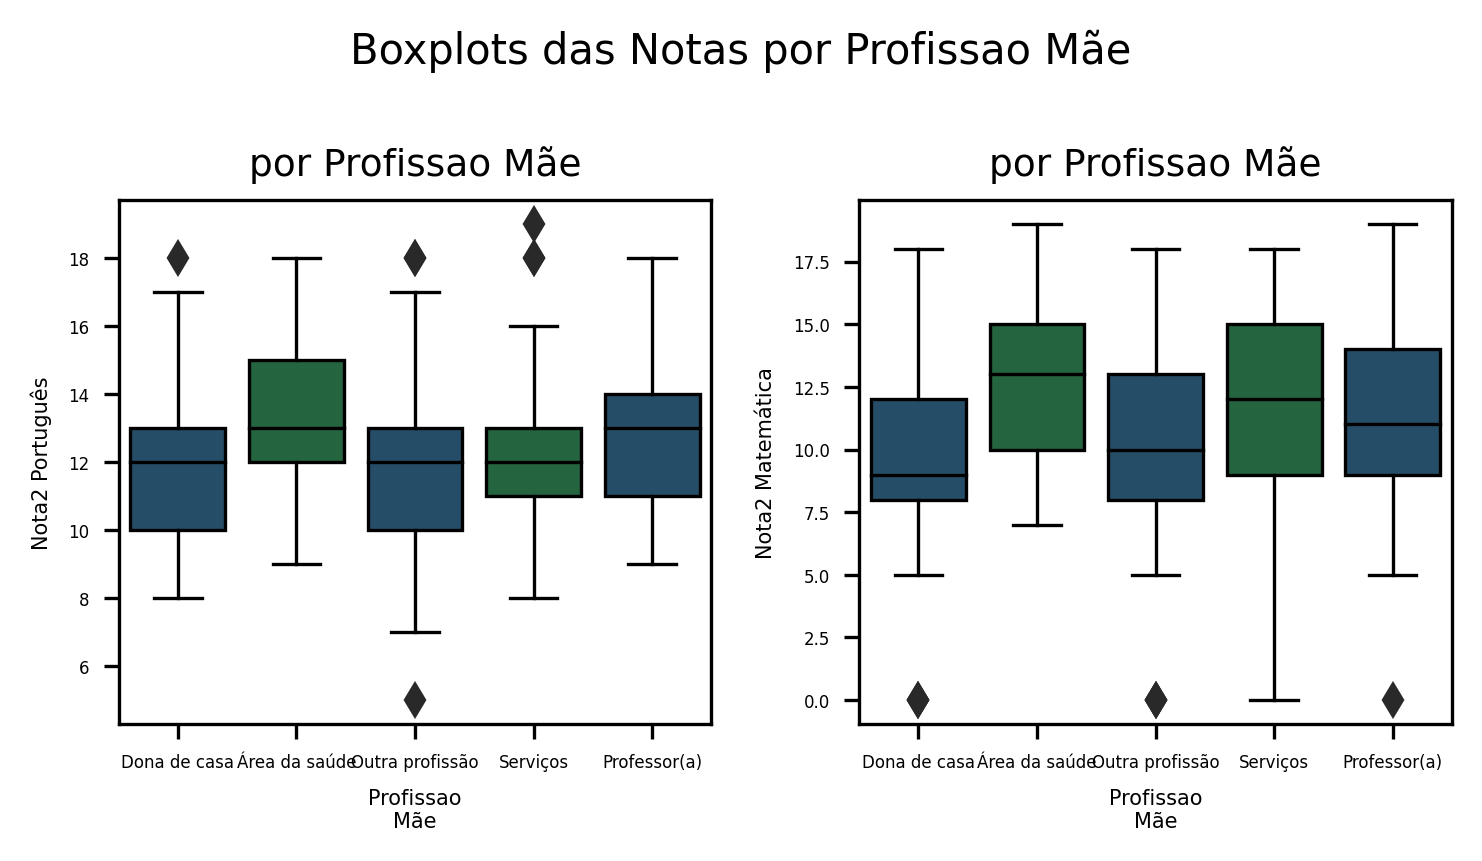

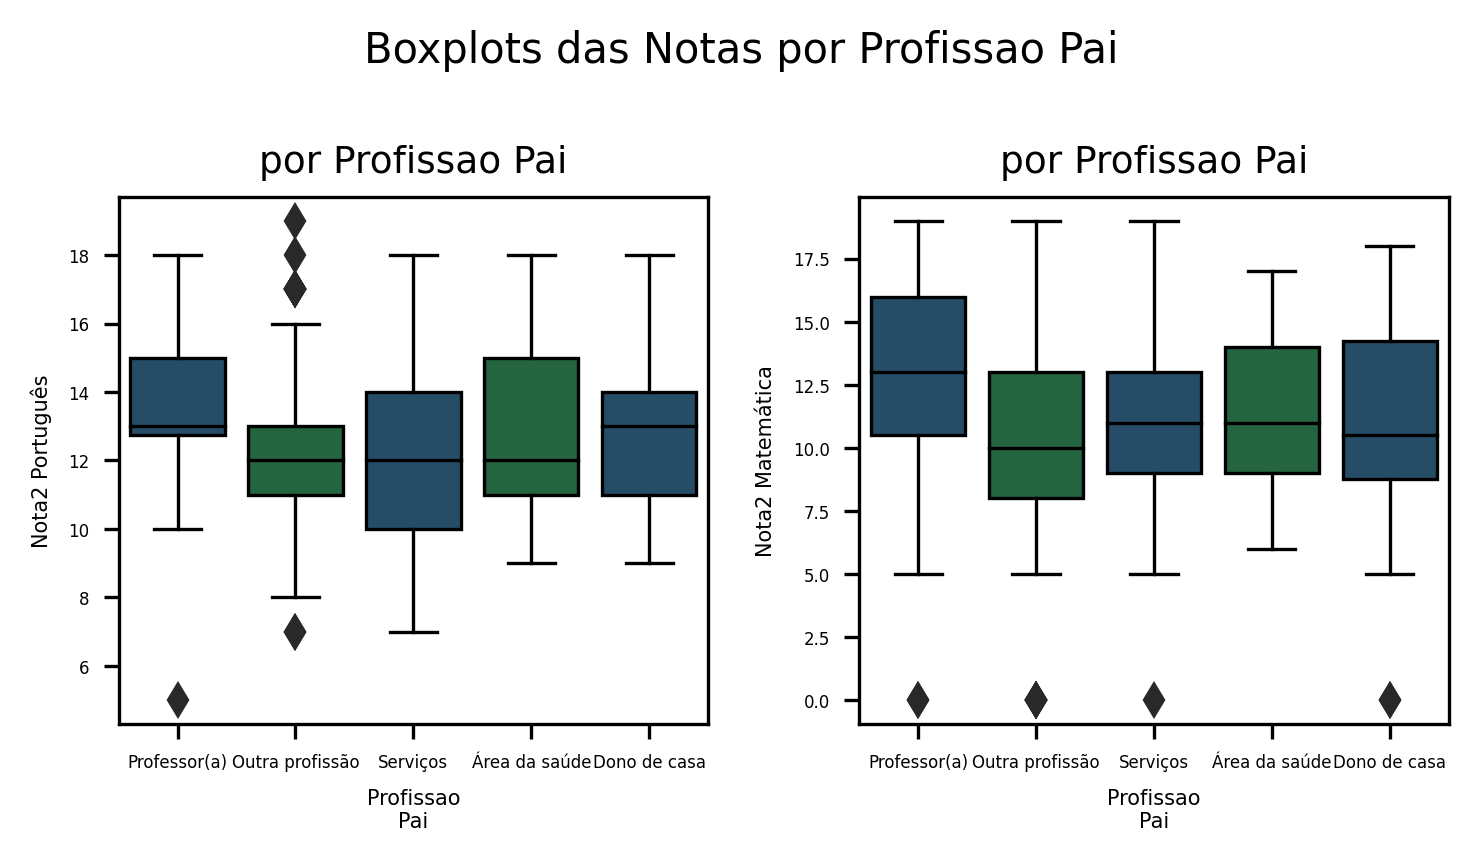

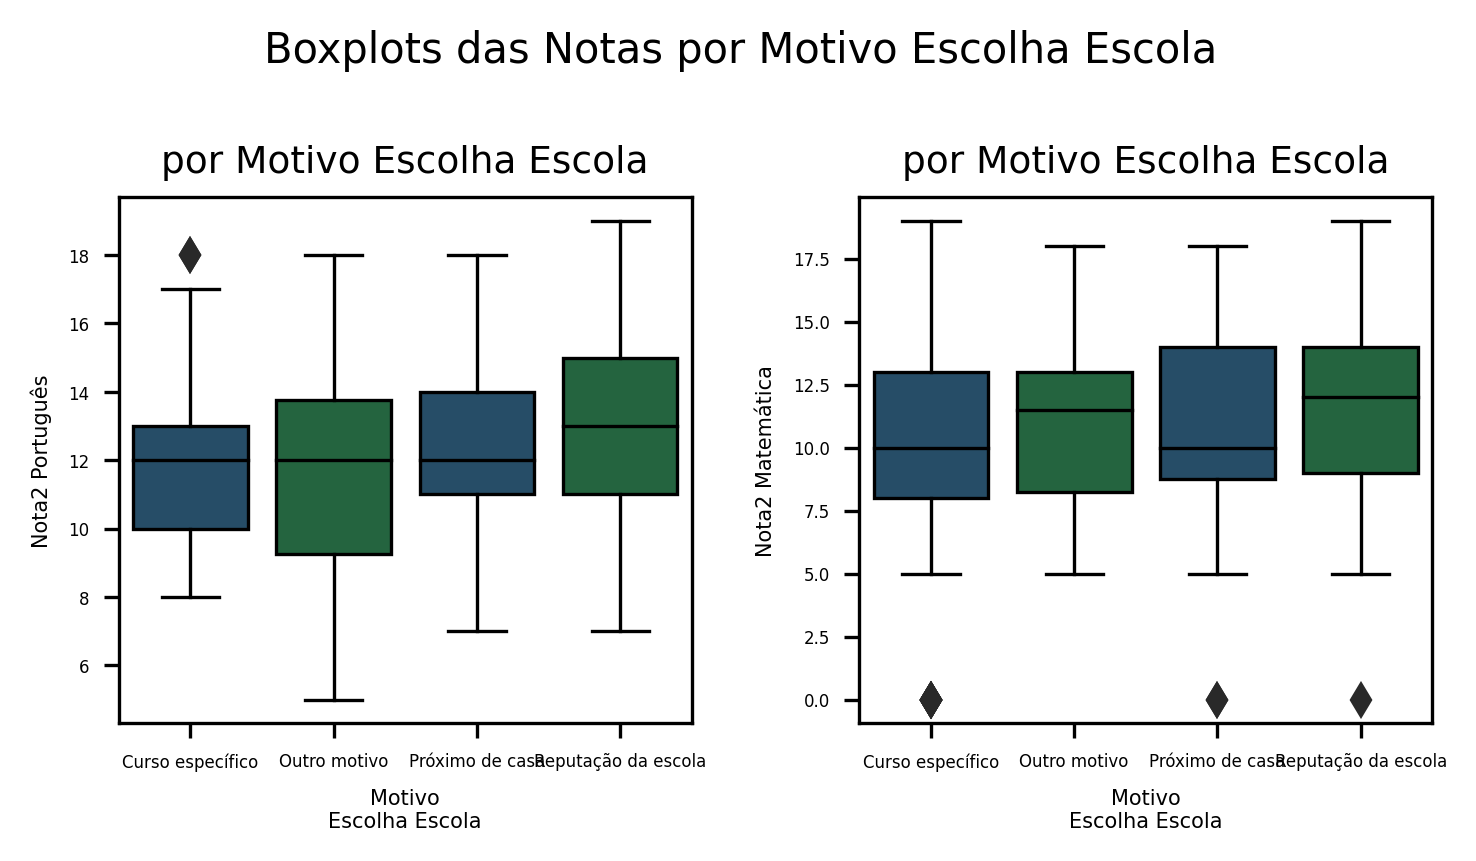

In [144]:
selecao_impacto_variaveis_categoricas(df_merge, variaveis_categoricas,
                                    materia= None,
                                    paleta='blue_to_green',
                                    coluna_avaliada='nota2')

##### **Nota Final**

Figura salva em: imagens\figuras\genero_desempenho_fraco.png.png
Figura salva em: imagens\figuras\escolaridade_mae_desempenho_fraco.png.png
Figura salva em: imagens\figuras\escolaridade_pai_desempenho_fraco.png.png
Figura salva em: imagens\figuras\profissao_mae_desempenho_fraco.png.png
Figura salva em: imagens\figuras\profissao_pai_desempenho_fraco.png.png
Figura salva em: imagens\figuras\motivo_escolha_escola_desempenho_fraco.png.png


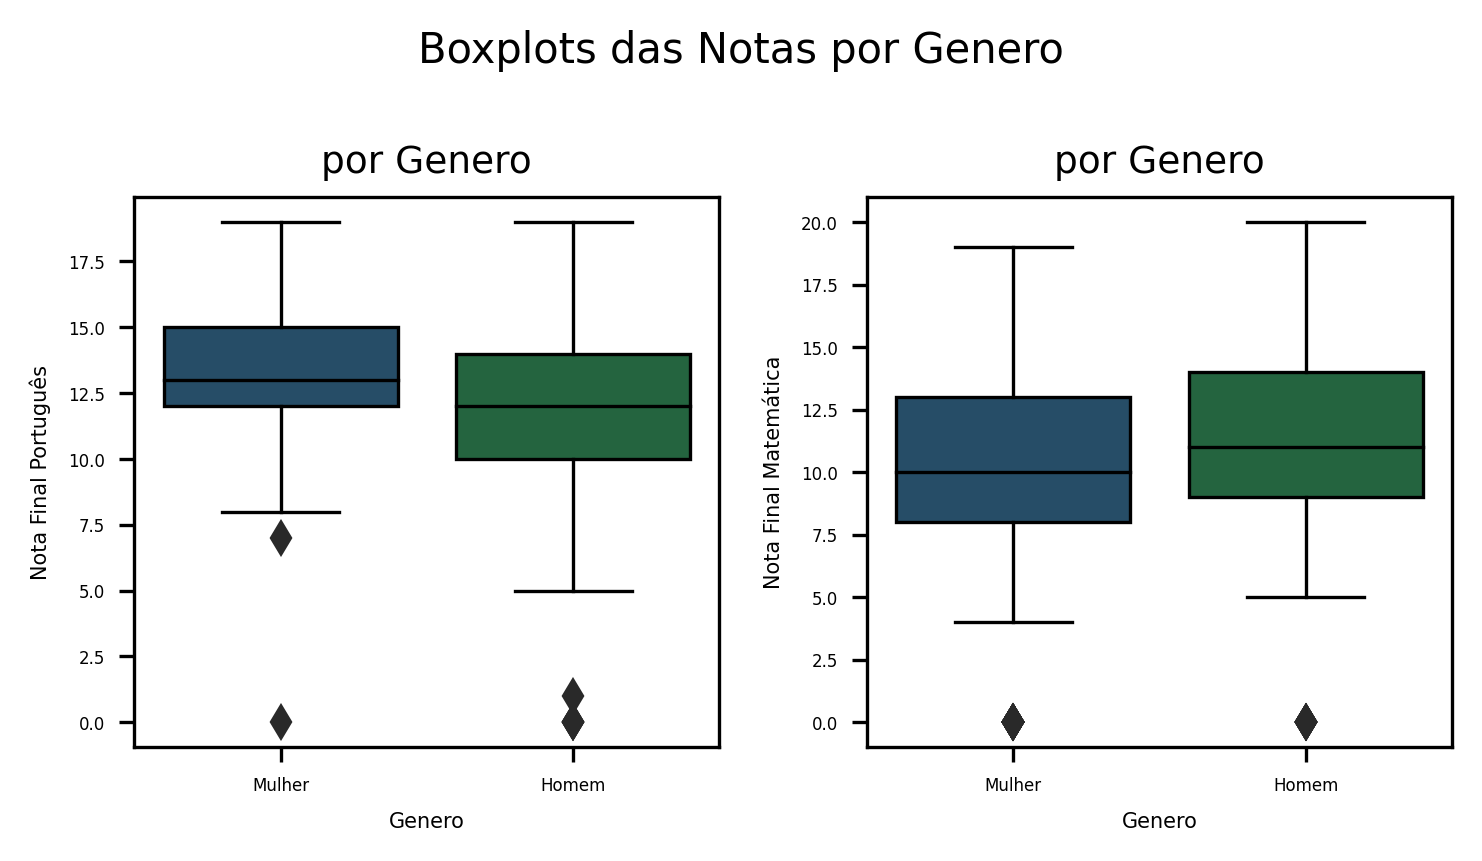

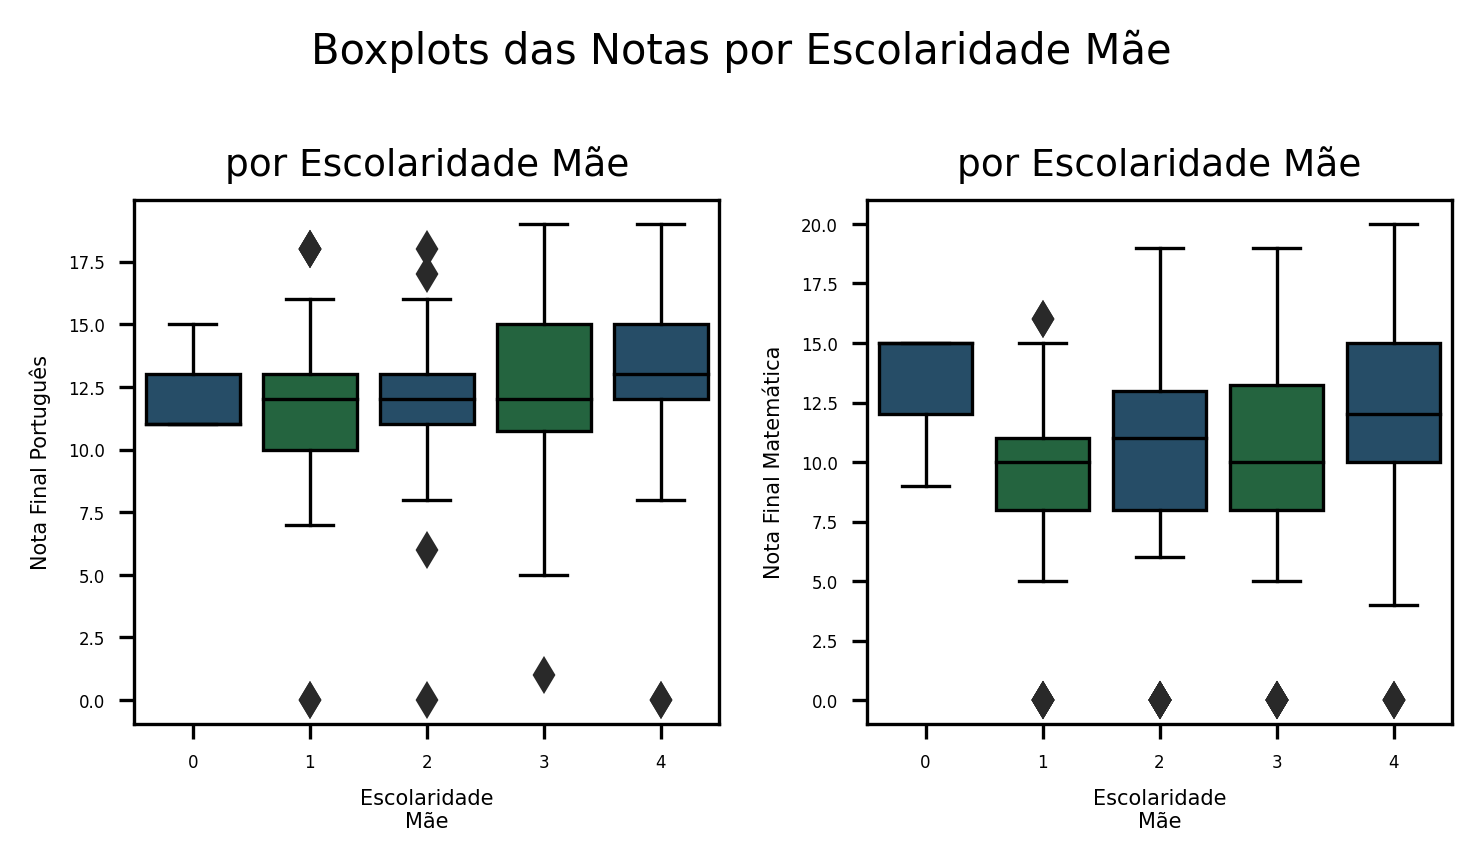

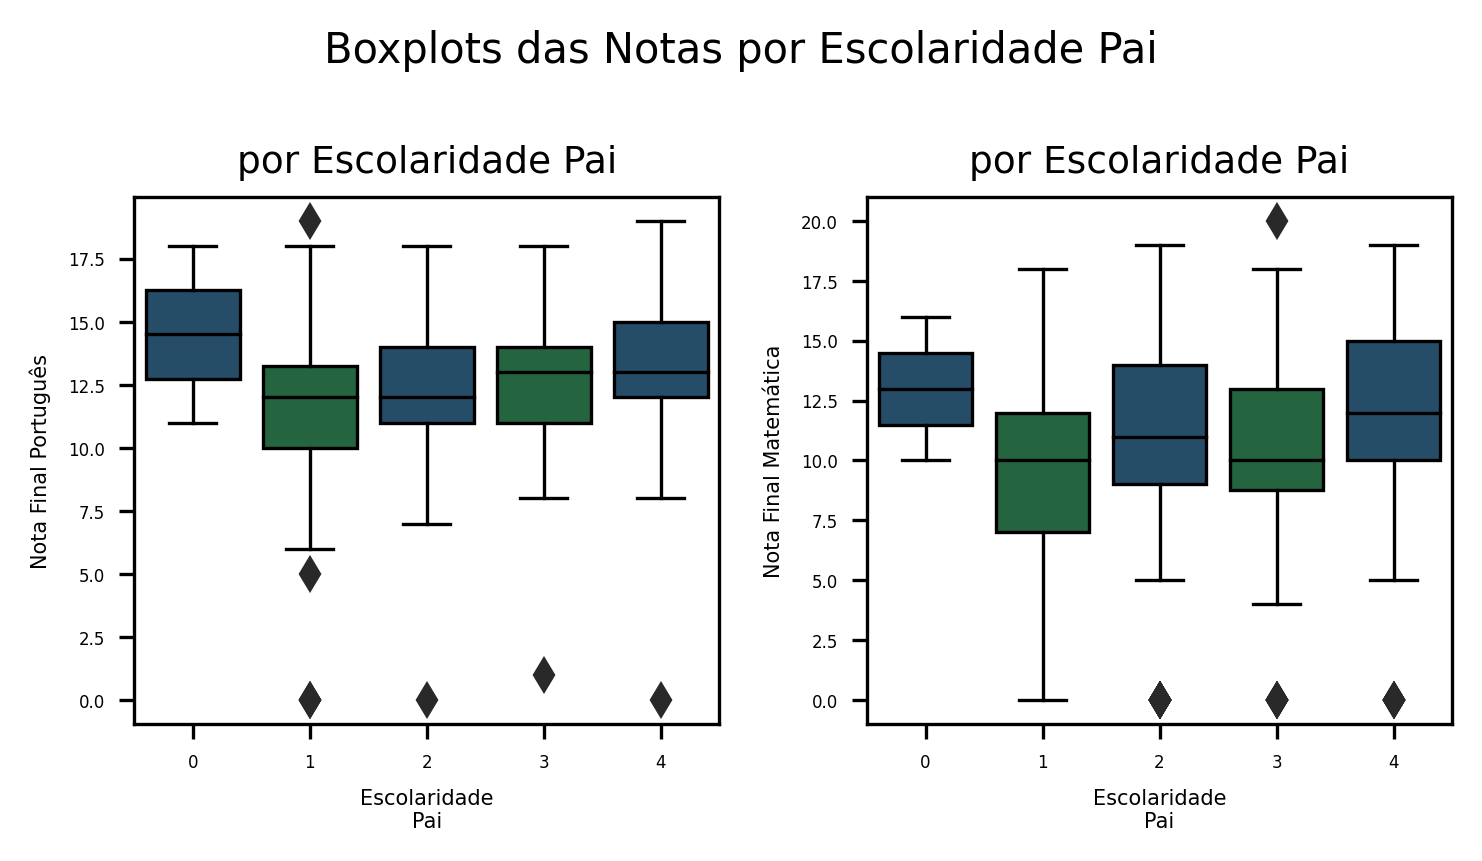

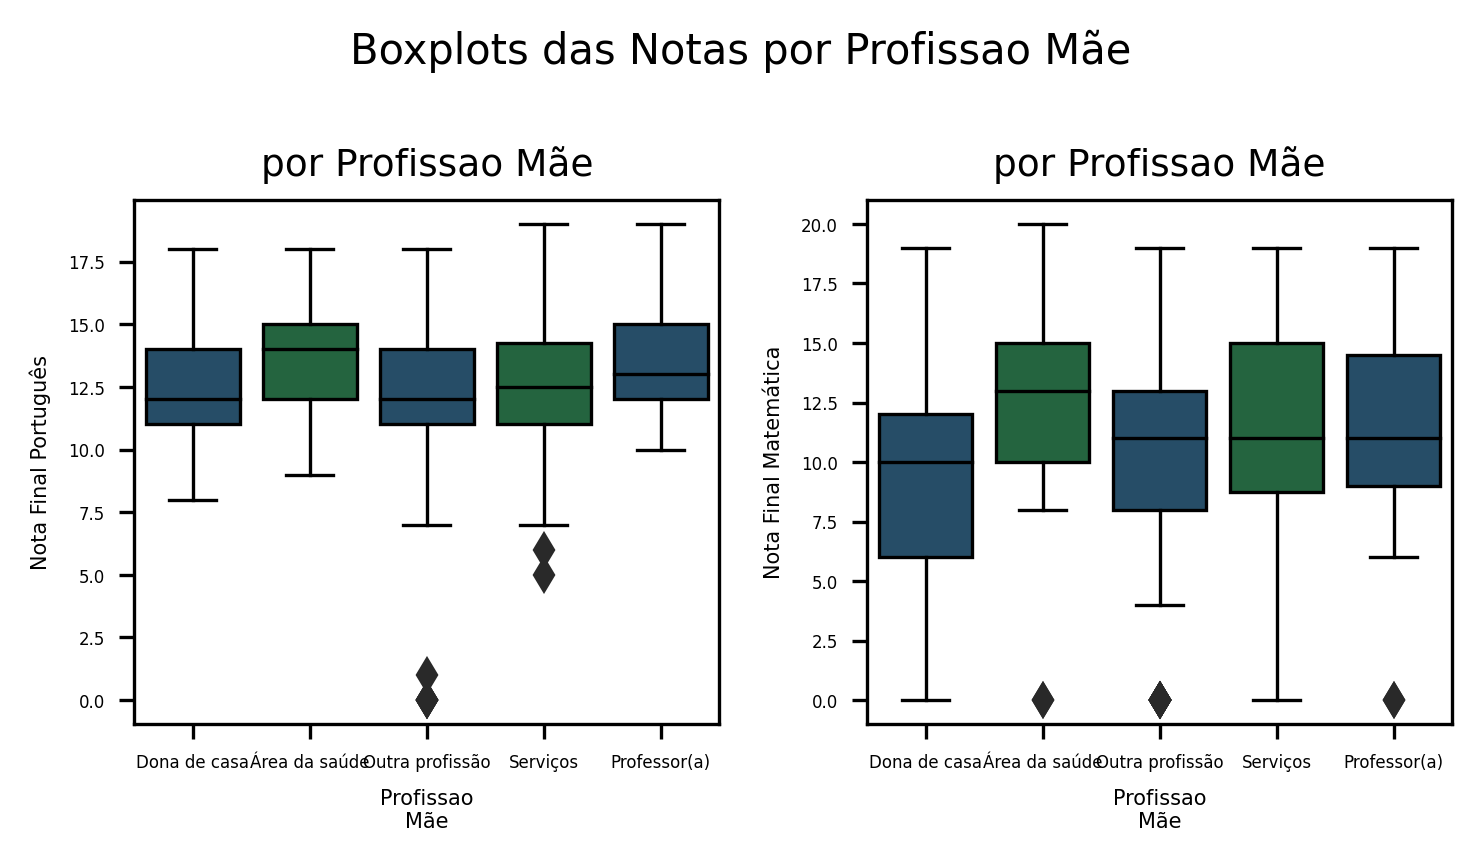

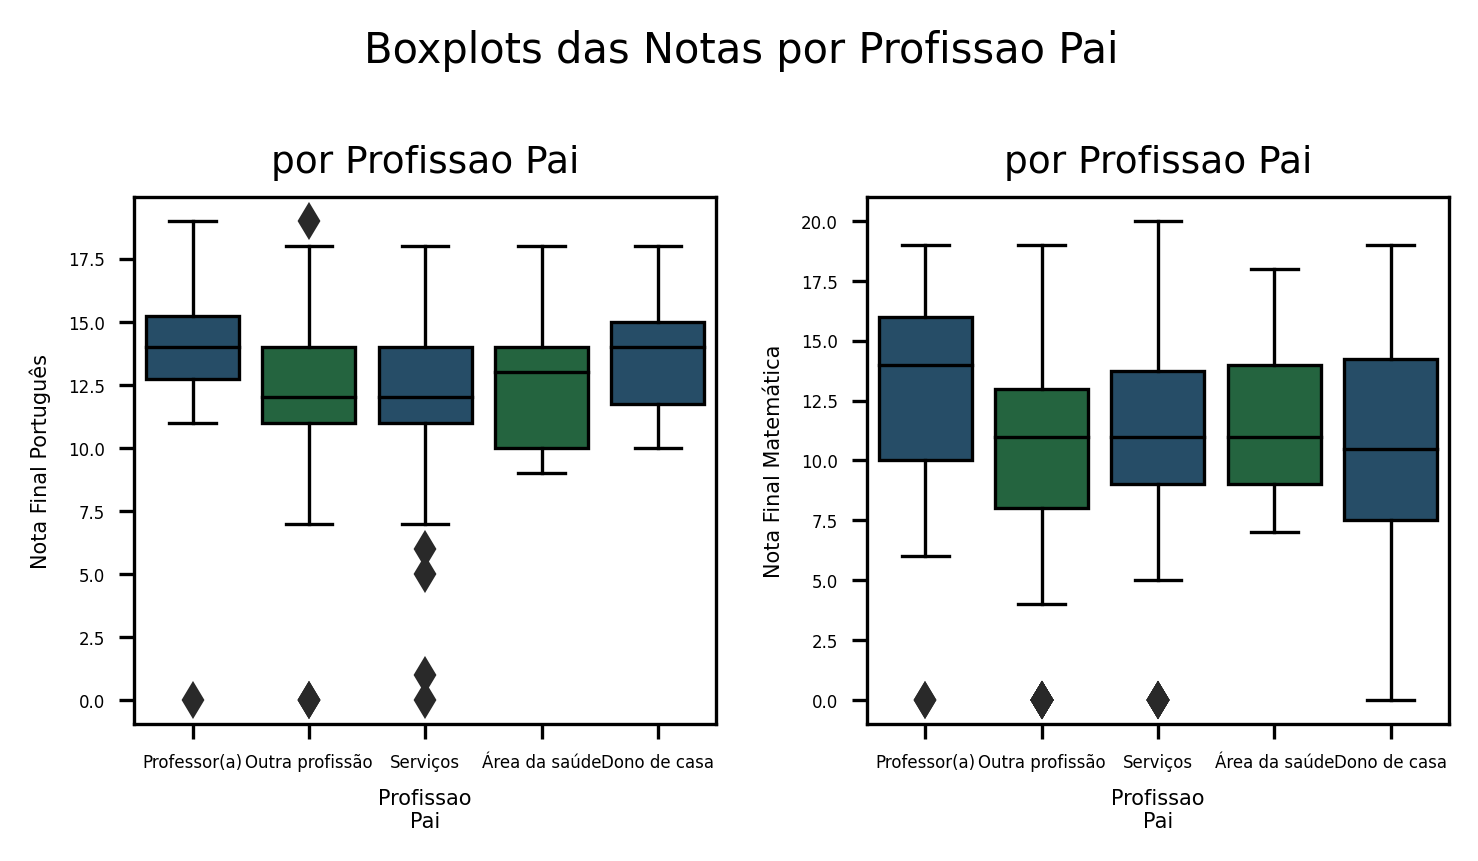

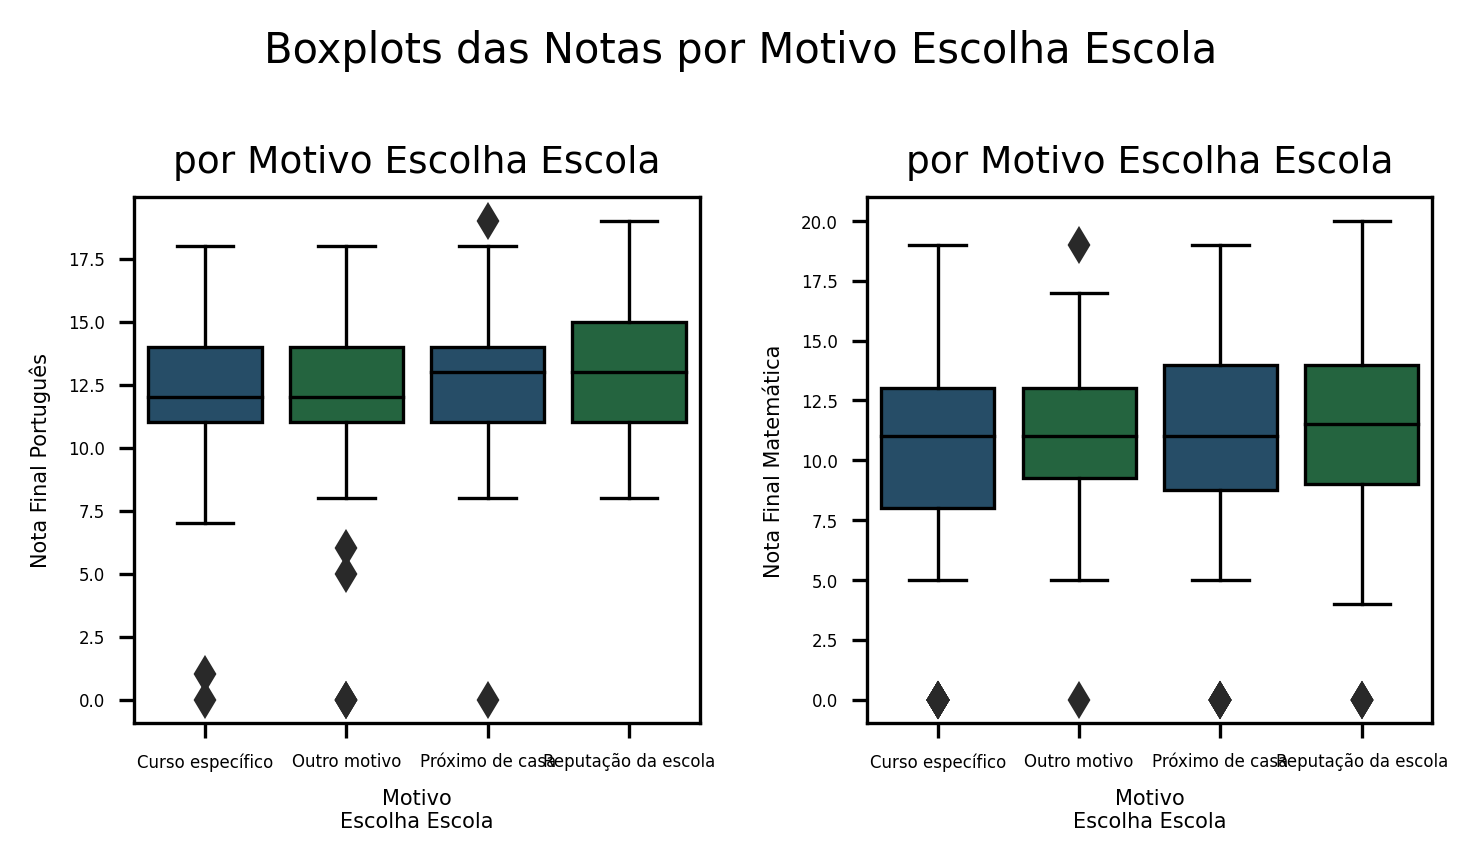

In [145]:
selecao_impacto_variaveis_categoricas(df_merge, variaveis_categoricas,
                                    materia= None,
                                    paleta='blue_to_green',
                                    coluna_avaliada='nota_final')

##### **Faltas**

Figura salva em: imagens\figuras\genero_desempenho_fraco.png.png
Figura salva em: imagens\figuras\escolaridade_mae_desempenho_fraco.png.png
Figura salva em: imagens\figuras\escolaridade_pai_desempenho_fraco.png.png
Figura salva em: imagens\figuras\profissao_mae_desempenho_fraco.png.png
Figura salva em: imagens\figuras\profissao_pai_desempenho_fraco.png.png
Figura salva em: imagens\figuras\motivo_escolha_escola_desempenho_fraco.png.png


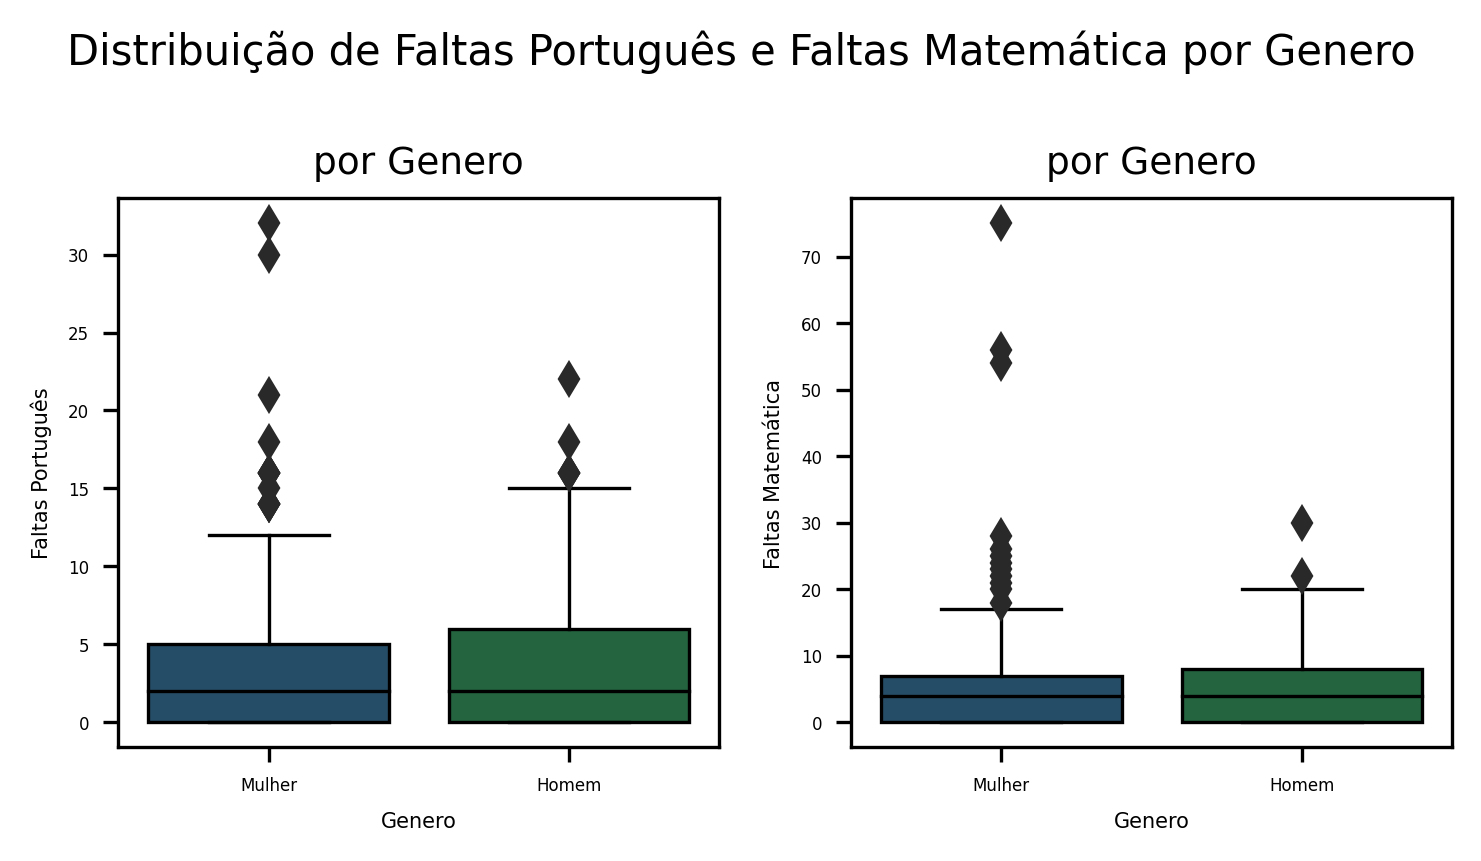

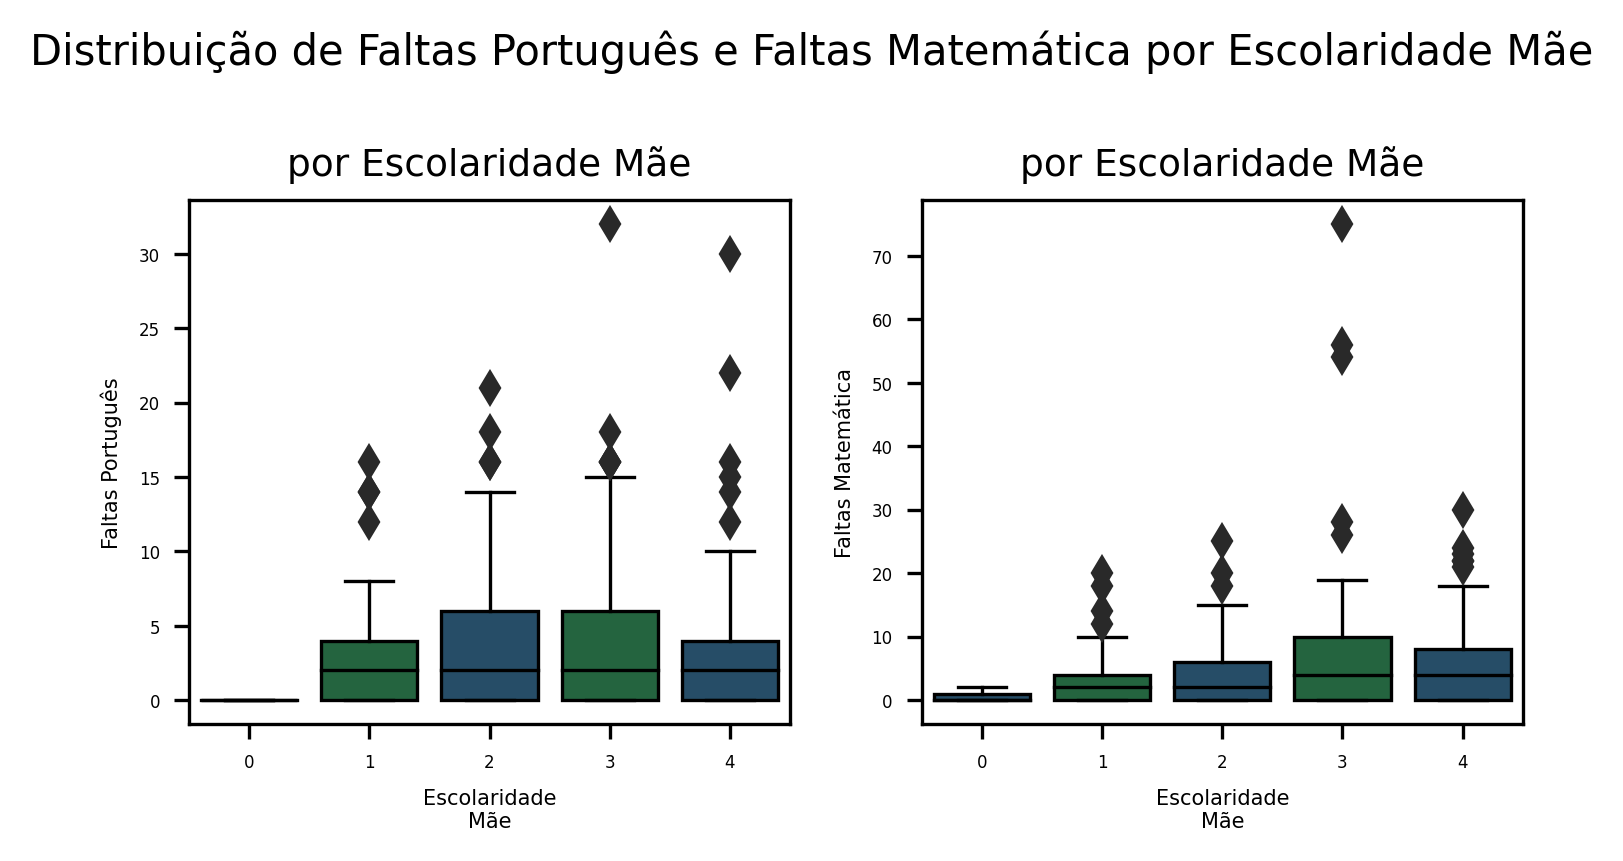

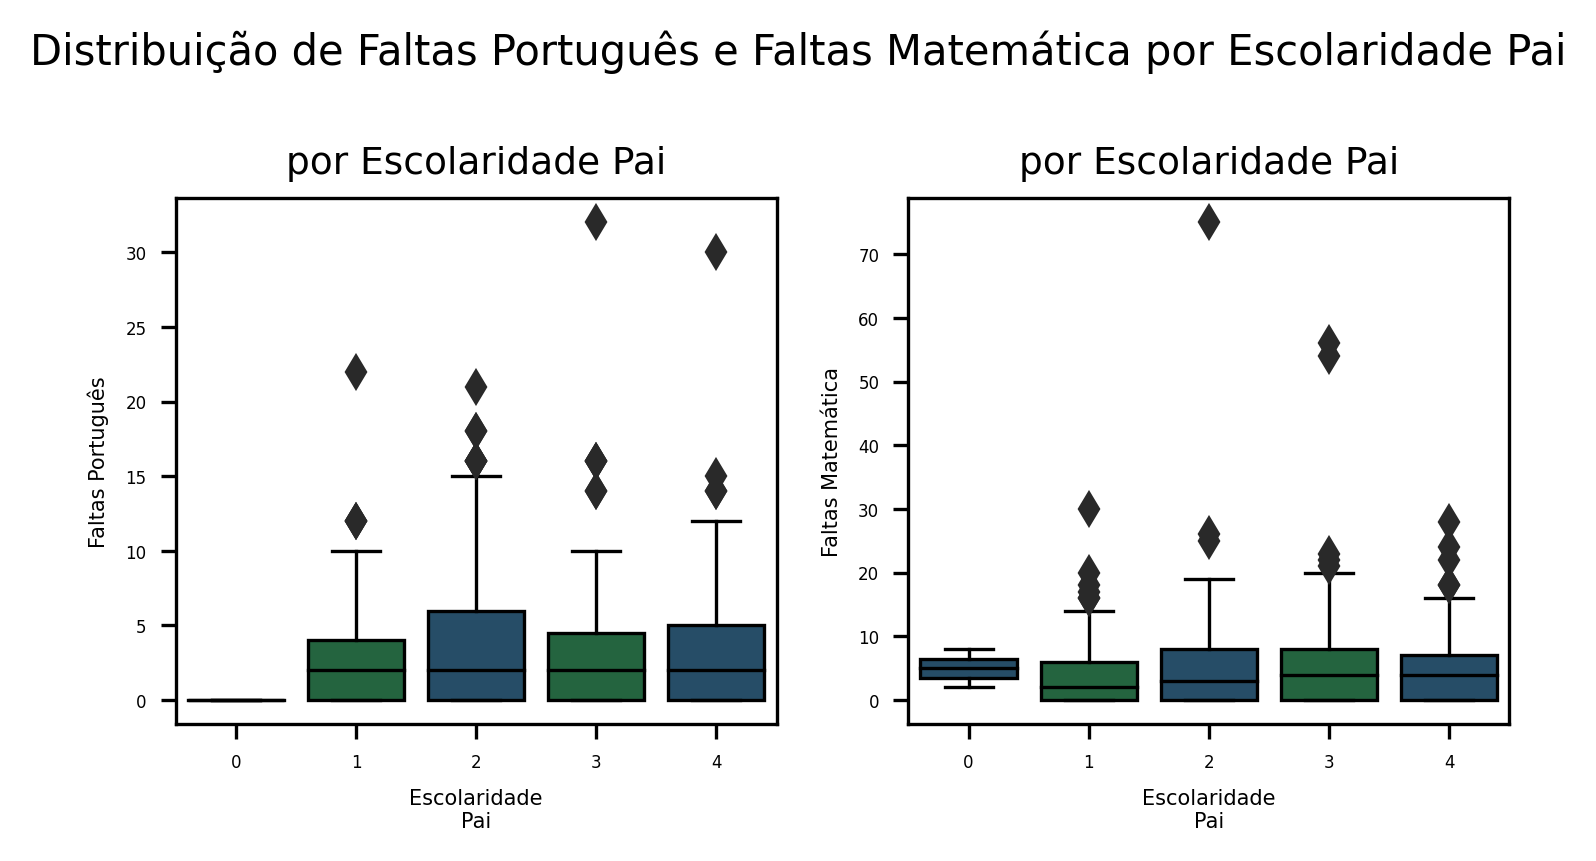

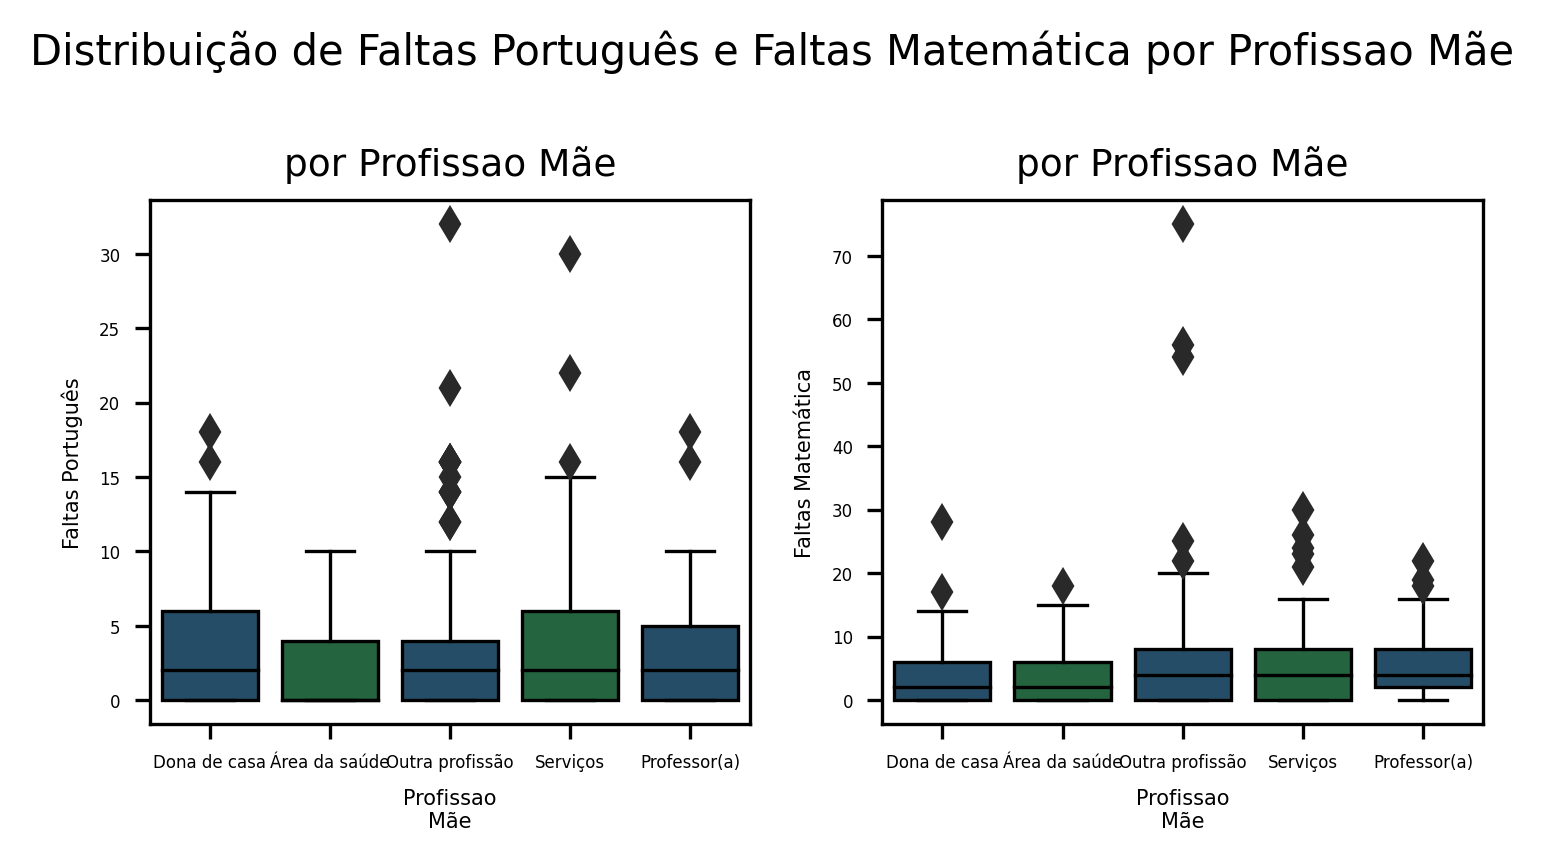

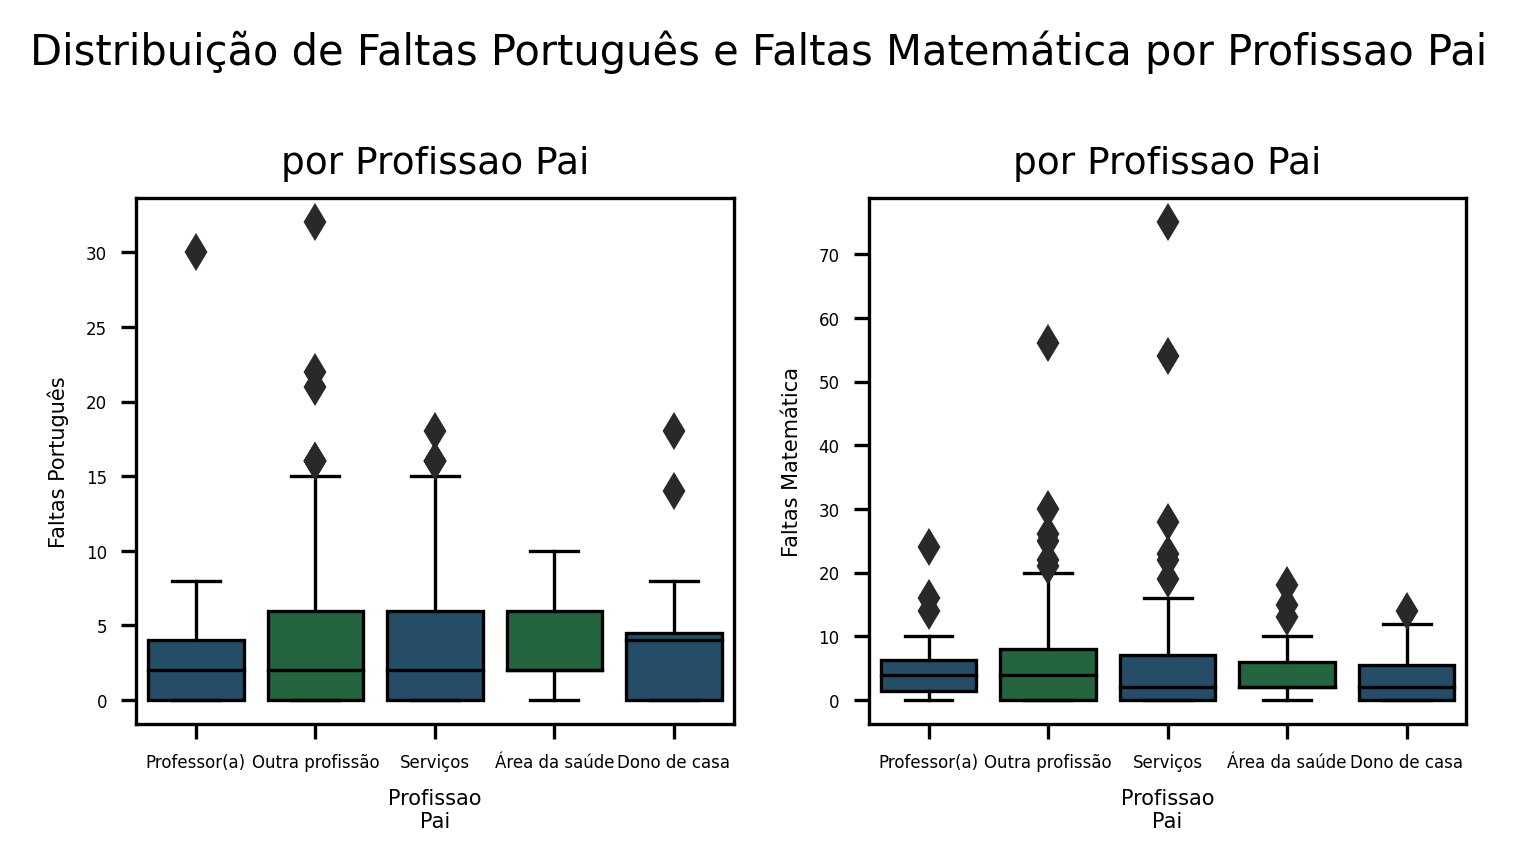

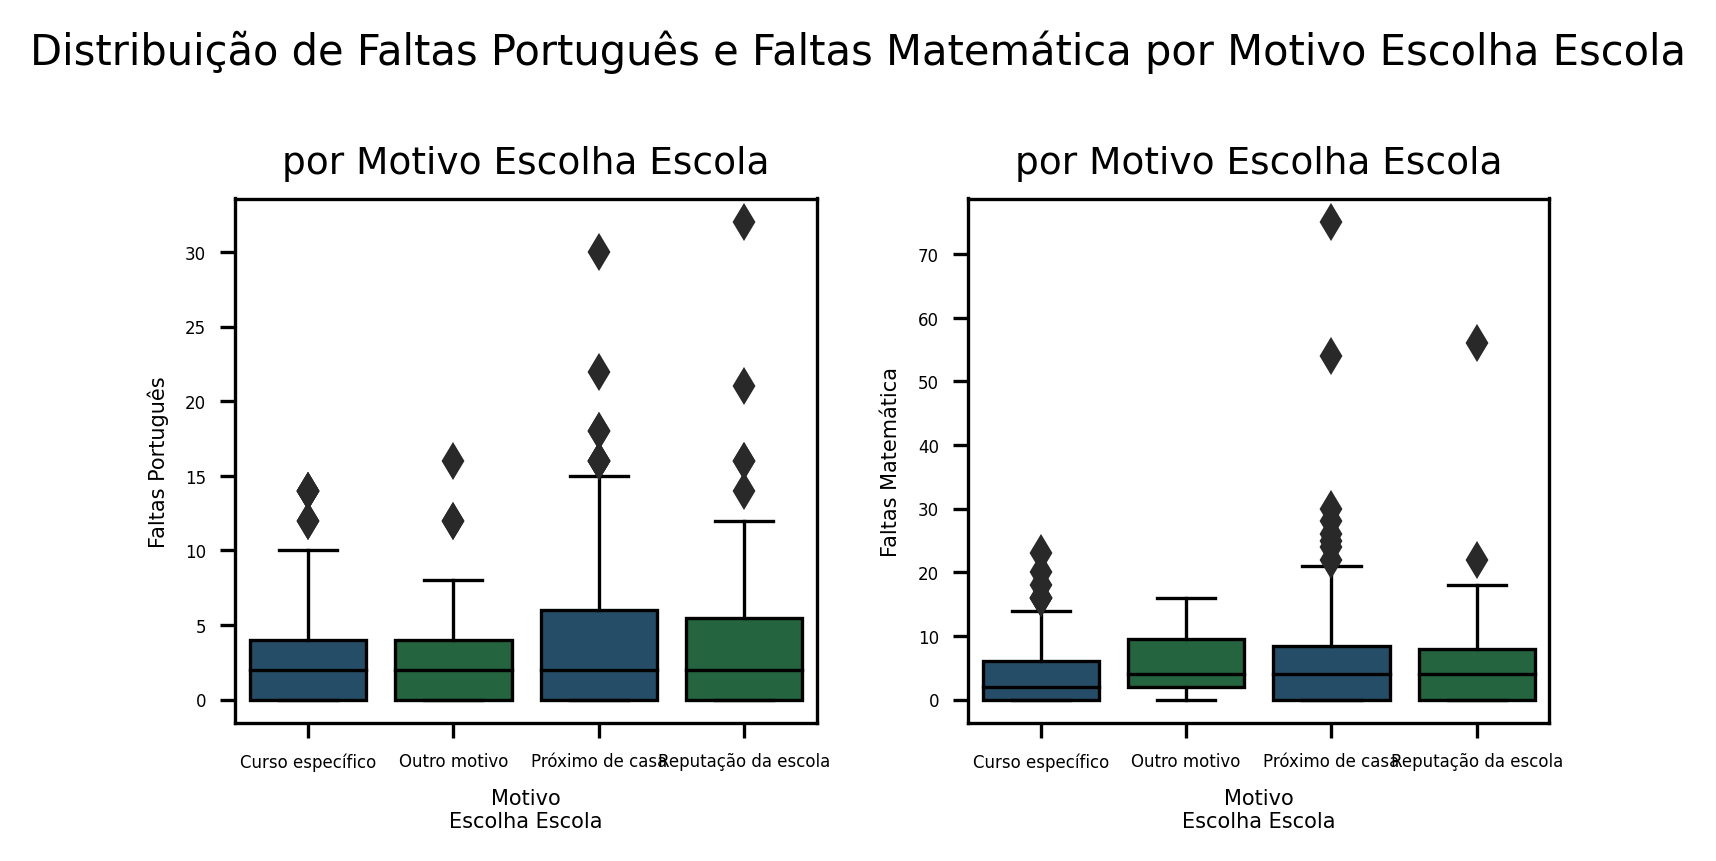

In [146]:
selecao_impacto_variaveis_categoricas(df_merge, variaveis_categoricas,
                                    materia= None,
                                    paleta='blue_to_green',
                                    coluna_avaliada='faltas',
                                    )

#### 4.3.2 Resumo Estatístico das Variáveis Categóricas Relevantes para Perfilamento


 **Notas**

##### **Nota 1**

###### Português

In [147]:
avaliacao_variacao_pontuacao_media_por_categoria(df_merge,variaveis_categoricas,coluna_avaliada='nota1_por')


Tamanho da amostra: 366


,Total de Categorias,Categoria Dominante,Frequência Relativa Dominante(%),Entropia Normalizada,Variação de Desempenho por Categoria
escolaridade_pai,5,2,28.688525,0.872,2.653
profissao_mae,5,Outra profissão,36.338798,0.930,1.703
escolaridade_mae,5,4,34.699454,0.853,1.508
motivo_escolha_escola,4,Curso específico,36.612022,0.935,1.077
profissao_pai,5,Outra profissão,55.464481,0.720,1.031


###### Matemática

In [148]:
avaliacao_variacao_pontuacao_media_por_categoria(df_merge,variaveis_categoricas,coluna_avaliada='nota1_mat')

Tamanho da amostra: 366


,Total de Categorias,Categoria Dominante,Frequência Relativa Dominante(%),Entropia Normalizada,Variação de Desempenho por Categoria
escolaridade_pai,5,2,28.688525,0.872,2.511
escolaridade_mae,5,4,34.699454,0.853,2.510
profissao_pai,5,Outra profissão,55.464481,0.720,2.570
profissao_mae,5,Outra profissão,36.338798,0.930,1.933


##### **Nota 2**

###### Português

In [149]:
avaliacao_variacao_pontuacao_media_por_categoria(df_merge,variaveis_categoricas,coluna_avaliada='nota2_por')


Tamanho da amostra: 366


,Total de Categorias,Categoria Dominante,Frequência Relativa Dominante(%),Entropia Normalizada,Variação de Desempenho por Categoria
escolaridade_pai,5,2,28.688525,0.872,2.500
escolaridade_mae,5,4,34.699454,0.853,1.535
profissao_mae,5,Outra profissão,36.338798,0.930,1.325
profissao_pai,5,Outra profissão,55.464481,0.720,1.275


###### Matemática

In [150]:
avaliacao_variacao_pontuacao_media_por_categoria(df_merge,variaveis_categoricas,coluna_avaliada='nota2_mat')

Tamanho da amostra: 366


,Total de Categorias,Categoria Dominante,Frequência Relativa Dominante(%),Entropia Normalizada,Variação de Desempenho por Categoria
escolaridade_pai,5,2,28.688525,0.872,3.708
escolaridade_mae,5,4,34.699454,0.853,3.565
profissao_mae,5,Outra profissão,36.338798,0.930,2.850
motivo_escolha_escola,4,Curso específico,36.612022,0.935,1.106
profissao_pai,5,Outra profissão,55.464481,0.720,1.839


##### **Nota Final**

###### Português

In [151]:
avaliacao_variacao_pontuacao_media_por_categoria(df_merge,variaveis_categoricas,coluna_avaliada='nota_final_por')


Tamanho da amostra: 366


,Total de Categorias,Categoria Dominante,Frequência Relativa Dominante(%),Entropia Normalizada,Variação de Desempenho por Categoria
escolaridade_pai,5,2,28.688525,0.872,2.931
motivo_escolha_escola,4,Curso específico,36.612022,0.935,1.781
profissao_mae,5,Outra profissão,36.338798,0.930,1.629
escolaridade_mae,5,4,34.699454,0.853,1.772
genero,2,Mulher,53.278689,0.997,1.143
profissao_pai,5,Outra profissão,55.464481,0.720,1.354


###### Matemática

In [152]:
avaliacao_variacao_pontuacao_media_por_categoria(df_merge,variaveis_categoricas,coluna_avaliada='nota_final_mat')

Tamanho da amostra: 366


,Total de Categorias,Categoria Dominante,Frequência Relativa Dominante(%),Entropia Normalizada,Variação de Desempenho por Categoria
escolaridade_mae,5,4,34.699454,0.853,4.286
escolaridade_pai,5,2,28.688525,0.872,3.972
profissao_mae,5,Outra profissão,36.338798,0.930,3.212
profissao_pai,5,Outra profissão,55.464481,0.720,2.643
genero,2,Mulher,53.278689,0.997,1.400
motivo_escolha_escola,4,Curso específico,36.612022,0.935,1.343


##### **Média das 3 Notas** 

In [153]:
df_copy = df_merge.copy()
df_copy['media_notas_por'] = (df_copy['nota1_por'] + df_copy['nota2_por'] + df_copy['nota_final_por'])/3
df_copy['media_notas_mat'] = (df_copy['nota1_mat'] + df_copy['nota2_mat'] + df_copy['nota_final_mat'])/3

###### Português

In [154]:
avaliacao_variacao_pontuacao_media_por_categoria(df_copy,variaveis_categoricas,coluna_avaliada='media_notas_por')


Tamanho da amostra: 366


,Total de Categorias,Categoria Dominante,Frequência Relativa Dominante(%),Entropia Normalizada,Variação de Desempenho por Categoria
escolaridade_pai,5,2,28.688525,0.872,2.694
profissao_mae,5,Outra profissão,36.338798,0.930,1.437
escolaridade_mae,5,4,34.699454,0.853,1.605
motivo_escolha_escola,4,Curso específico,36.612022,0.935,1.251
profissao_pai,5,Outra profissão,55.464481,0.720,1.167


###### Matemática

In [155]:
avaliacao_variacao_pontuacao_media_por_categoria(df_copy,variaveis_categoricas,coluna_avaliada='media_notas_mat')


Tamanho da amostra: 366


,Total de Categorias,Categoria Dominante,Frequência Relativa Dominante(%),Entropia Normalizada,Variação de Desempenho por Categoria
escolaridade_pai,5,2,28.688525,0.872,3.394
escolaridade_mae,5,4,34.699454,0.853,3.454
profissao_mae,5,Outra profissão,36.338798,0.930,2.665
profissao_pai,5,Outra profissão,55.464481,0.720,2.135
genero,2,Mulher,53.278689,0.997,1.100
motivo_escolha_escola,4,Curso específico,36.612022,0.935,1.087


**Faltas**

###### Português

In [156]:
avaliacao_variacao_pontuacao_media_por_categoria(df_merge,variaveis_categoricas,coluna_avaliada='faltas_por')

Tamanho da amostra: 366


,Total de Categorias,Categoria Dominante,Frequência Relativa Dominante(%),Entropia Normalizada,Variação de Desempenho por Categoria
escolaridade_mae,5,4,34.699454,0.853,4.435
escolaridade_pai,5,2,28.688525,0.872,4.010
profissao_mae,5,Outra profissão,36.338798,0.930,2.178
motivo_escolha_escola,4,Curso específico,36.612022,0.935,1.624
profissao_pai,5,Outra profissão,55.464481,0.720,1.232


###### Matemática

In [157]:
avaliacao_variacao_pontuacao_media_por_categoria(df_merge,variaveis_categoricas,coluna_avaliada='faltas_mat')

Tamanho da amostra: 366


,Total de Categorias,Categoria Dominante,Frequência Relativa Dominante(%),Entropia Normalizada,Variação de Desempenho por Categoria
escolaridade_mae,5,4,34.699454,0.853,6.768
motivo_escolha_escola,4,Curso específico,36.612022,0.935,3.305
profissao_mae,5,Outra profissão,36.338798,0.930,1.793
escolaridade_pai,5,2,28.688525,0.872,1.542
profissao_pai,5,Outra profissão,55.464481,0.720,2.127


# 4. Inspeção - Comparativo de desempenho

### 4.3.4 PONTUAÇÃO FINAL IGUAL

In [158]:
df_merge["notas_iguais"] = df_merge["nota_final_por"] == df_merge["nota_final_mat"]
print(f'{round(100*df_merge["notas_iguais"].mean(),2)}% dos alunos apresentam notas finais iguais em português e matemática')


10.38% dos alunos apresentam notas finais iguais em português e matemática


In [159]:
print(f'tamanho da amostra: {df_merge[df_merge["notas_iguais"] == True].shape[0]}')
df_merge[df_merge["notas_iguais"] == True].head()

tamanho da amostra: 38


,escola,genero,idade,endereco,tamanho_familia,status_parental,escolaridade_mae,escolaridade_pai,profissao_mae,profissao_pai,motivo_escolha_escola,responsavel_legal_mat,tempo_transporte_mat,tempo_estudo_mat,reprovacoes_mat,apoio_escolar_mat,apoio_familiar_mat,aulas_particulares_mat,atividades_extracurriculares_mat,frequentou_creche,intencao_superior_mat,acesso_internet,relacionamento_romantico_mat,relacao_familiar_mat,tempo_livre_mat,frequencia_saidas_mat,alcool_dias_uteis_mat,alcool_fim_semana_mat,saude_mat,faltas_mat,nota1_mat,nota2_mat,nota_final_mat,aprovacao_mat,responsavel_legal_por,tempo_transporte_por,tempo_estudo_por,reprovacoes_por,apoio_escolar_por,apoio_familiar_por,aulas_particulares_por,atividades_extracurriculares_por,intencao_superior_por,relacionamento_romantico_por,relacao_familiar_por,tempo_livre_por,frequencia_saidas_por,alcool_dias_uteis_por,alcool_fim_semana_por,saude_por,faltas_por,nota1_por,nota2_por,nota_final_por,aprovacao_por,notas_iguais
16,Gabriel Pereira,Mulher,16,Urbano,Mais de 3 membros,Juntos,4,4,Serviços,Serviços,Reputação da escola,Mãe,1,3,0,Não,Sim,Sim,Sim,Sim,Sim,Sim,Não,3,2,3,1,2,2,6,13,14,14,Aprovado,Mãe,1,3,0,Não,Sim,Não,Sim,Sim,Não,3,2,3,1,2,2,10,13,13,14,Aprovado,True
33,Gabriel Pereira,Homem,15,Urbano,3 membros ou menos,Juntos,3,3,Outra profissão,Outra profissão,Curso específico,Mãe,1,2,0,Não,Não,Não,Sim,Não,Sim,Sim,Não,5,3,2,1,1,2,0,8,10,12,Aprovado,Mãe,1,2,0,Não,Não,Não,Sim,Sim,Não,5,3,2,1,1,2,0,13,12,12,Aprovado,True
50,Gabriel Pereira,Mulher,16,Urbano,3 membros ou menos,Juntos,2,2,Serviços,Serviços,Curso específico,Mãe,3,2,0,Não,Sim,Sim,Não,Sim,Sim,Sim,Não,4,3,3,2,3,4,2,12,13,13,Aprovado,Mãe,3,2,0,Não,Sim,Não,Não,Sim,Não,4,3,3,2,3,4,0,14,13,13,Aprovado,True
54,Gabriel Pereira,Mulher,15,Urbano,3 membros ou menos,Separados,3,3,Outra profissão,Outra profissão,Outro motivo,Mãe,1,1,0,Não,Não,Sim,Não,Sim,Sim,Sim,Não,5,3,4,4,4,1,6,10,13,13,Aprovado,Mãe,1,1,0,Não,Não,Não,Não,Sim,Não,5,3,4,4,4,1,0,13,12,13,Aprovado,True
56,Gabriel Pereira,Mulher,15,Urbano,Mais de 3 membros,Separados,4,3,Serviços,Serviços,Reputação da escola,Mãe,1,2,0,Não,Sim,Sim,Sim,Sim,Sim,Sim,Não,4,3,2,1,1,1,0,14,15,15,Aprovado,Mãe,1,2,0,Não,Sim,Não,Sim,Sim,Não,4,3,2,1,1,1,0,15,14,15,Aprovado,True


In [160]:
resumo = df_merge[df_merge["notas_iguais"]][["nota_final_por", "nota_final_mat"]].value_counts().reset_index(name = 'Número de Alunos')
resumo = resumo.T
resumo = resumo.reset_index()
resumo.columns = resumo.iloc[0]   
resumo = resumo.drop(index=0)     


In [161]:
resumo.T

,1,2
0,,
nota_final_por,nota_final_mat,Número de Alunos
10,10,9
12,12,7
13,13,6
11,11,4
15,15,4
0,0,2
14,14,2
8,8,1


In [162]:
# Cálculo da descrição estatística
descricao = df_merge[['nota_final_por', 'nota_final_mat', 'faltas_por', 'faltas_mat']].describe()

# Adicionando o Coeficiente de Variação (CV)
cv = (descricao.loc['std'] / descricao.loc['mean']) * 100
cv.name = 'cv (%)'

# Incluindo o CV na tabela descritiva
descricao = descricao.drop(index='count').append(cv)

descricao = descricao.T

descricao

,mean,std,min,25%,50%,75%,max,cv (%)
nota_final_por,12.568306,2.935747,0.0,11.0,13.0,14.0,19.0,23.358333
nota_final_mat,10.546448,4.534407,0.0,8.0,11.0,14.0,20.0,42.994640
faltas_por,3.554645,4.704532,0.0,0.0,2.0,6.0,32.0,132.348866
faltas_mat,5.434426,7.689866,0.0,0.0,4.0,8.0,75.0,141.502820


#### Aprovação vs Reprovação

A análise global das bases revela que a taxa de aprovação em Português é significativamente superior à de Matemática. Enquanto apenas 15,41% dos alunos são reprovados em Português, a reprovação em Matemática atinge 32,91% dos estudantes. O cruzamento dos resultados entre as disciplinas indica que 28,08% dos alunos conseguem aprovação em Português, mas não em Matemática, evidenciando uma necessidade de atenção especial no ensino de conteúdos matemáticos.

In [163]:
# Contagem para Português
contagem_p = df_p['aprovacao'].value_counts()
proporcao_p = df_p['aprovacao'].value_counts(normalize=True) * 100

# Contagem para Matemática
contagem_m = df_m['aprovacao'].value_counts()
proporcao_m = df_m['aprovacao'].value_counts(normalize=True) * 100


df_sintese = pd.DataFrame({
    'Disciplina': ['Português', 'Português', 'Matemática', 'Matemática'],
    'Situação': ['Aprovado', 'Reprovado', 'Aprovado', 'Reprovado'],
    'Quantidade (n)': [
        contagem_p.get('Aprovado', 0),
        contagem_p.get('Reprovado', 0),
        contagem_m.get('Aprovado', 0),
        contagem_m.get('Reprovado', 0)
    ],
    'Proporção (%)': [
        proporcao_p.get('Aprovado', 0).round(2),
        proporcao_p.get('Reprovado', 0).round(2),
        proporcao_m.get('Aprovado', 0).round(2),
        proporcao_m.get('Reprovado', 0).round(2)
    ]
})
df_sintese


,Disciplina,Situação,Quantidade (n),Proporção (%)
0,Português,Aprovado,549,84.59
1,Português,Reprovado,100,15.41
2,Matemática,Aprovado,265,67.09
3,Matemática,Reprovado,130,32.91


In [164]:
aprovados_nas_duas_materias = df_merge[(df_merge['aprovacao_mat'] == 'Aprovado') & (df_merge['aprovacao_por'] == 'Aprovado')]

reprovados_nas_duas_materias = df_merge[(df_merge['aprovacao_mat'] == 'Reprovado') & (df_merge['aprovacao_por'] == 'Reprovado')]


##### Perfilamento Aprovados

In [165]:
avaliacao_variacao_pontuacao_media_por_categoria(aprovados_nas_duas_materias,variaveis_categoricas,coluna_avaliada='nota_final_mat')

Tamanho da amostra: 241


,Total de Categorias,Categoria Dominante,Frequência Relativa Dominante(%),Entropia Normalizada,Variação de Desempenho por Categoria
escolaridade_mae,5,4,39.419087,0.832,3.407
profissao_mae,5,Outra profissão,34.024896,0.936,1.702
profissao_pai,5,Outra profissão,56.431535,0.711,2.005
escolaridade_pai,5,2,29.875519,0.869,1.357


In [166]:
avaliacao_variacao_pontuacao_media_por_categoria(aprovados_nas_duas_materias,variaveis_categoricas,coluna_avaliada='nota_final_por')

Tamanho da amostra: 241


,Total de Categorias,Categoria Dominante,Frequência Relativa Dominante(%),Entropia Normalizada,Variação de Desempenho por Categoria
profissao_pai,5,Outra profissão,56.431535,0.711,1.453
profissao_mae,5,Outra profissão,34.024896,0.936,1.055
escolaridade_pai,5,2,29.875519,0.869,1.125
escolaridade_mae,5,4,39.419087,0.832,1.109


##### Perfilamento Reprovados

In [167]:
avaliacao_variacao_pontuacao_media_por_categoria(reprovados_nas_duas_materias,variaveis_categoricas,coluna_avaliada='nota_final_mat')

Tamanho da amostra: 20


,Total de Categorias,Categoria Dominante,Frequência Relativa Dominante(%),Entropia Normalizada,Variação de Desempenho por Categoria
motivo_escolha_escola,4,Curso específico,45.0,0.920,4.333
escolaridade_mae,4,1,40.0,0.930,4.150
escolaridade_pai,4,1,55.0,0.819,4.091
profissao_mae,3,Outra profissão,55.0,0.908,3.436
escola,2,Gabriel Pereira,65.0,0.934,1.890
profissao_pai,2,Serviços,55.0,0.993,1.051


In [168]:
avaliacao_variacao_pontuacao_media_por_categoria(reprovados_nas_duas_materias,variaveis_categoricas,coluna_avaliada='nota_final_por')

Tamanho da amostra: 20


,Total de Categorias,Categoria Dominante,Frequência Relativa Dominante(%),Entropia Normalizada,Variação de Desempenho por Categoria
motivo_escolha_escola,4,Curso específico,45.0,0.920,4.533
profissao_mae,3,Outra profissão,55.0,0.908,3.227
escolaridade_mae,4,1,40.0,0.930,3.000
escolaridade_pai,4,1,55.0,0.819,2.955
escola,2,Gabriel Pereira,65.0,0.934,2.143
profissao_pai,2,Serviços,55.0,0.993,1.465
endereco,2,Urbano,55.0,0.993,1.061


In [169]:
df_merge['media_nota_final_pm'] = (df_merge['nota_final_por']+df_merge['nota_final_por'])/2

In [170]:
df_dif, n_baixo, n_alto, q1_lim, q3_lim = identificar_extremos_comparaveis(
    df_merge, 'media_nota_final_pm', variaveis_categoricas
)

,Variável,Categoria,% Grupo Nota Baixa (≤10.0),% Grupo Nota Alta (≥16.0),Diferença Absoluta (%)
4,escolaridade_mae,4,15.3% (11/72),46.6% (27/58),31.3
0,genero,Homem,65.3% (47/72),39.7% (23/58),25.6
1,genero,Mulher,34.7% (25/72),60.3% (35/58),25.6
2,endereco,Urbano,62.5% (45/72),84.5% (49/58),22.0
3,endereco,Rural,37.5% (27/72),15.5% (9/58),22.0
5,escolaridade_pai,4,13.9% (10/72),34.5% (20/58),20.6
6,profissao_mae,Professor(a),5.6% (4/72),20.7% (12/58),15.1


['#eaf6ee', '#bae0c6', '#69b283', '#357e53', '#1c4030']
Figura salva em: imagens\graficos_diferencas_perfil_por_mat\top5_diferencas_perfil.png


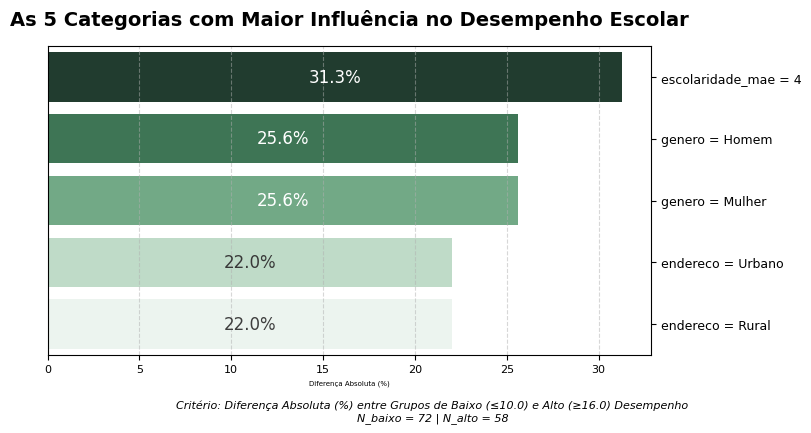

In [171]:
plot_top_diferencas_extremos(
    df_diferencas=df_dif,
    materia=None,
    q1_lim= q1_lim,
    q3_lim=q3_lim,
    n_baixo=n_baixo,
    n_alto=n_alto,
    top_n = 5,
    diretorio='graficos_diferencas_perfil_por_mat',
    salvar=True
)